In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_score, StratifiedKFold, cross_validate
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
import talib 


# <span style = 'color:red'>I. Read in the Final Data

In [2]:
df = pd.read_csv(r'D:\Visual Studio Projects\BWIN Project\inputs_data\final_data.csv', index_col = 0)
df = df.loc['2016':]
display(df)
df.to_csv("final_data.csv")

,GDP,CPI,Interest,Net Income Margin,Diluted EPS,Current Ratio,Cash Conversion Cycle,Debt to Equity,Volume,Unemployment,MA30,MA7,RSI,ADX,ATR,OBV,Walmart,S&P500
2016-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.367783,2072.780029
2016-04-02,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,19807200.0,5.1,NaN,NaN,NaN,NaN,NaN,1.980720e+07,19.367783,2072.780029
2016-04-03,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,19807200.0,5.1,NaN,NaN,NaN,NaN,NaN,1.980720e+07,19.367783,2072.780029
2016-04-04,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,19807200.0,5.1,NaN,NaN,NaN,NaN,NaN,1.980720e+07,19.379004,2066.129883
2016-04-05,0.040717,0.011726,0.37,3.53,NaN,0.9322,11.0492,0.554831,20470200.0,5.1,NaN,NaN,NaN,NaN,NaN,4.027740e+07,19.249998,2045.170044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-21,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,50375900.0,4.4,103.150000,102.785715,66.236972,16.657892,0.965509,2.345305e+09,105.320000,6602.990234
2025-11-22,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,41391700.0,4.4,103.089333,103.191429,57.969827,16.606589,1.024401,2.303913e+09,105.320000,6602.990234
2025-11-23,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,41391700.0,4.4,103.038000,103.597143,57.969827,16.558951,0.951230,2.303913e+09,105.320000,6602.990234
2025-11-24,0.060387,0.030227,3.88,3.96,0.88,0.7921,3.9990,0.671237,41391700.0,4.4,103.009666,104.002857,57.969827,16.514716,0.883285,2.303913e+09,104.059998,6705.120117


## <span style = 'color:red'> Fitting the initial LSTM model

In [3]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler  # Changed from MinMaxScaler to StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization  # Import BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # Import callbacks
# import matplotlib.pyplot as plt
# import pickle  # Import pickle for saving scalers
# import pandas as pd  # Ensure pandas is imported for date handling
# from datetime import datetime

# df = pd.read_csv('final_data.csv', index_col=0, parse_dates=True)


# for i in range(1,2):  # FIXED: Lags 1 to 5
#     df[f'Walmart_Lag{i}'] = df['Walmart'].shift(i)

# for i in range(1,2):  # FIXED: Lags 1 to 5
#     df[f'S&P500_Lag{i}'] = df['S&P500'].shift(i)

# df_lstm = df.dropna().copy()

# features_to_exclude_from_X_lstm = ['Walmart', 'S&P500']
# X_data = df_lstm.drop(columns=features_to_exclude_from_X_lstm).values
# y_data = df_lstm['Walmart'].values.reshape(-1, 1)

# scaler_X = StandardScaler()
# X_scaled = scaler_X.fit_transform(X_data)

# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y_data)

# n_steps = 7

# def create_sequences(X, y, n_steps):
#     X_seq, y_seq = [], []
#     for i in range(len(X) - n_steps):
#         X_seq.append(X[i:(i + n_steps), :])
#         y_seq.append(y[i + n_steps, 0])
#     return np.array(X_seq), np.array(y_seq)

# X_seq, y_seq = create_sequences(X_scaled, y_scaled, n_steps)
# sequence_dates = df_lstm.index[n_steps:]

# val_start_date = pd.to_datetime('2025-01-01')
# val_end_date = datetime.now()

# train_mask = sequence_dates < val_start_date
# test_mask = (sequence_dates >= val_start_date) & (sequence_dates <= val_end_date)

# X_train = X_seq[train_mask]
# y_train = y_seq[train_mask]
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]

# print(f"Training set size: {len(X_train)} sequences")
# print(f"Test/Validation set size (from {val_start_date.strftime('%Y-%m-%d')} to {val_end_date.strftime('%Y-%m-%d')}): {len(X_test)} sequences")

# model = Sequential()
# model.add(LSTM(512, return_sequences=True, input_shape=(n_steps, X_seq.shape[2])))
# model.add(Dropout(0.2))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(1))

# model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
# print(model.summary())

# model_filepath = 'best_lstm_model.keras'
# checkpoint = ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=20, mode='min', verbose=1, restore_best_weights=True)

# print("\nTraining the LSTM model...")
# history = model.fit(
#     X_train, y_train,
#     epochs=150,
#     batch_size=100,
#     validation_split=0.1,
#     verbose=1,
#     callbacks=[checkpoint, early_stopping]
# )

# best_model = tf.keras.models.load_model(model_filepath)
# loss = best_model.evaluate(X_test, y_test, verbose=0)
# print(f'\nTest/Validation Loss (Mean Squared Error) from best model: {loss[0]:.4f}')

# y_pred_scaled = best_model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# plt.figure(figsize=(16, 8))
# test_dates_plot = sequence_dates[test_mask]
# plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price (Test/Validation)', color='blue')
# plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price (Test/Validation)', color='red', linestyle='--')
# plt.title('Walmart Stock Price Prediction using LSTM (Actual vs. Predicted - Test/Validation Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.show()

# y_train_pred_scaled = best_model.predict(X_train)
# y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
# y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))

# plt.figure(figsize=(16, 8))
# train_dates_plot = sequence_dates[train_mask]
# plt.plot(train_dates_plot, y_train_actual, label='Actual Walmart Price (Train)', color='green')
# plt.plot(train_dates_plot, y_train_pred, label='Fitted Walmart Price (Train)', color='orange', linestyle='--')
# plt.title('Walmart Stock Price Fitting using LSTM (Actual vs. Fitted - Training Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.show()

# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Epochs')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()

# with open('scaler_X.pkl', 'wb') as f:
#     pickle.dump(scaler_X, f)
# with open('scaler_y.pkl', 'wb') as f:
#     pickle.dump(scaler_y, f)
# print(f"\nScalers saved to 'scaler_X.pkl' and 'scaler_y.pkl'")

# np.savez(
#     'lstm_preprocessed_data.npz',
#     X_seq=X_seq,
#     y_seq=y_seq,
#     sequence_dates_values=sequence_dates.values,
#     train_mask=train_mask,
#     test_mask=test_mask
# )
# print(f"Preprocessed LSTM data saved to 'lstm_preprocessed_data.npz'")


## <span style = 'color:red'> II. Loading the initial LSTM model

📊 LSTM MODEL PREDICTIONS VISUALIZATION

[Step 1/3] Loading model, scalers, and preprocessed data...
   ✓ LSTM model loaded successfully
   ✓ Scalers loaded successfully
   ✓ Preprocessed data loaded successfully

   📊 Data Statistics for Test/Validation Set:
      Test samples:    322
      Sequence shape:  (322, 7, 18)
      Features per step: 18
      Time steps:      7

[Step 2/3] Generating predictions and inverse transforming data...
   ✓ Predictions generated and inverse transformed.

📊 Model Accuracy Statistics:


,Metric,Value
0,Root Mean Squared Error (RMSE),$7.02
1,Mean Absolute Error (MAE),$6.17
2,Mean Absolute Percentage Error (MAPE),6.25%
3,R-squared (R²),-0.5943
4,Directional Accuracy,32.40%



[Step 3/3] Creating and saving visualization...
   ✓ Plot saved as 'lstm_validation_actual_vs_predicted.png'


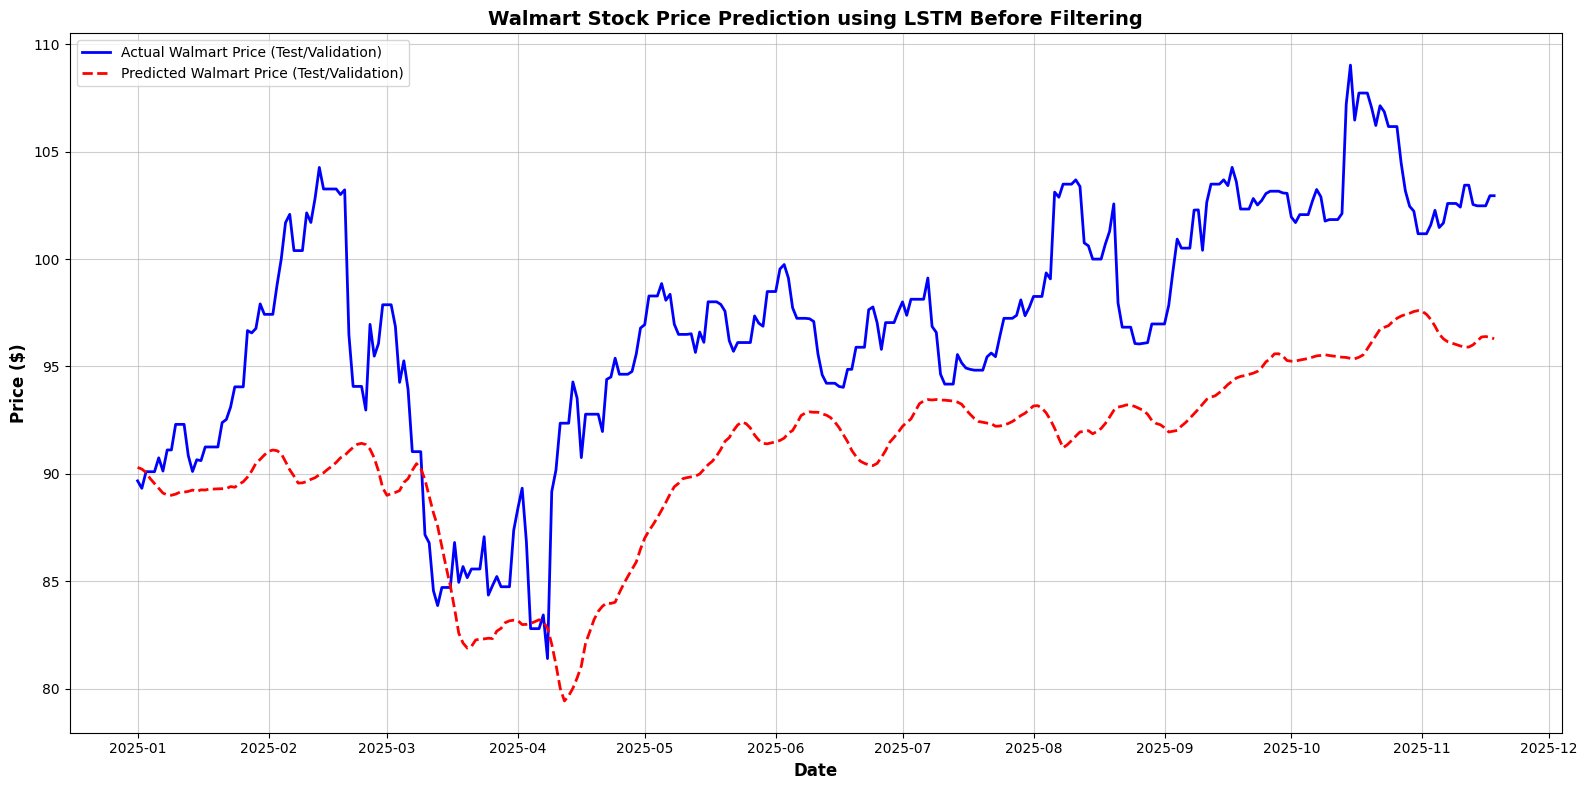


✅ VISUALIZATION COMPLETE!


In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

print("="*80)
print("📊 LSTM MODEL PREDICTIONS VISUALIZATION")
print("="*80)

# ======================================================================
# 1. LOAD MODEL, SCALERS, AND DATA
# ======================================================================
print("\n[Step 1/3] Loading model, scalers, and preprocessed data...")
try:
    # Load the trained LSTM model
    best_model = tf.keras.models.load_model(r'D:\Visual Studio Projects\BWIN Project\saved_models\best_lstm_model.keras')
    print("   ✓ LSTM model loaded successfully")
    
    # Load scalers
    with open(r'D:\Visual Studio Projects\BWIN Project\standard_scalars\scaler_X.pkl', 'rb') as f: 
        scaler_X = pickle.load(f)
    with open(r'D:\Visual Studio Projects\BWIN Project\standard_scalars\scaler_y.pkl', 'rb') as f: 
        scaler_y = pickle.load(f)
    print("   ✓ Scalers loaded successfully")
    
    # Load preprocessed data
    data = np.load(r'D:\Visual Studio Projects\BWIN Project\saved_models\lstm_preprocessed_data.npz', allow_pickle=True)
    X_seq = data['X_seq']
    y_seq = data['y_seq']
    sequence_dates = pd.to_datetime(data['sequence_dates_values'])
    train_mask = data['train_mask']
    test_mask = data['test_mask']
    print("   ✓ Preprocessed data loaded successfully")
    
except FileNotFoundError as e:
    print(f"   ✗ Error: Required file not found - {e}")
    print("   Please ensure you have run the LSTM training script first to generate these files.")
    exit()
except Exception as e:
    print(f"   ✗ Unexpected error loading files: {e}")
    exit()

# Split data for the test/validation set
X_test = X_seq[test_mask]
y_test = y_seq[test_mask]
test_dates_plot = sequence_dates[test_mask]

print(f"\n   📊 Data Statistics for Test/Validation Set:")
print(f"      Test samples:    {len(X_test):,}")
print(f"      Sequence shape:  {X_test.shape}")
print(f"      Features per step: {X_test.shape[2]}")
print(f"      Time steps:      {X_test.shape[1]}")


# 2. GENERATE PREDICTIONS AND INVERSE TRANSFORM
# ======================================================================
print("\n[Step 2/3] Generating predictions and inverse transforming data...")

# Make predictions on the test set
y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)

# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("   ✓ Predictions generated and inverse transformed.")


# ACCURACY STATISTICS
# ======================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd # Import pandas

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_actual, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
# Avoid division by zero for MAPE if actual values can be zero
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

# Calculate R-squared
r2 = r2_score(y_test_actual, y_pred)

# Calculate Directional Accuracy
# Compare the sign of actual price changes with predicted price changes
actual_direction = np.sign(np.diff(y_test_actual.flatten()))
pred_direction = np.sign(np.diff(y_pred.flatten()))
direction_accuracy = np.mean(actual_direction == pred_direction) * 100

# Create a DataFrame for accuracy statistics
accuracy_metrics = pd.DataFrame({
    'Metric': [
        'Root Mean Squared Error (RMSE)',
        'Mean Absolute Error (MAE)',
        'Mean Absolute Percentage Error (MAPE)',
        'R-squared (R²)',
        'Directional Accuracy'
    ],
    'Value': [
        f"${rmse:.2f}",
        f"${mae:.2f}",
        f"{mape:.2f}%",
        f"{r2:.4f}",
        f"{direction_accuracy:.2f}%"
    ]
})

print("\n📊 Model Accuracy Statistics:")
display(accuracy_metrics) # Display the DataFrame



# 3. PLOT ACTUAL VS. PREDICTED DATA
# ======================================================================
print("\n[Step 3/3] Creating and saving visualization...")

plt.figure(figsize=(16, 8))
plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price (Test/Validation)', color='blue', linewidth=2)
plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price (Test/Validation)', color='red', linestyle='--', linewidth=2)
plt.title('Walmart Stock Price Prediction using LSTM Before Filtering', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.6)
plt.tight_layout()

# Save the plot as a PNG file
output_filename = 'lstm_validation_actual_vs_predicted.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"   ✓ Plot saved as '{output_filename}'")
plt.show()
plt.close()

print("\n" + "="*80)
print("✅ VISUALIZATION COMPLETE!")
print("="*80)

## <span style = 'color:red'> III. Apply SHAP to find out the importance of each variable

In [5]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pickle
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import warnings
# import joblib
# from datetime import datetime

# # --- FIX: Ensure 'display' is available in the notebook environment ---
# try:
#   from IPython.display import display
# except ImportError:
#   # Define a placeholder function if not in an IPython environment
#   def display(obj):
#     if hasattr(obj, '_repr_html_'):
#       print(obj._repr_html_())
#     elif hasattr(obj, 'figure'):
#       obj.figure.show()
#     else:
#       print(obj)
      
# # ---------------------------------------------------------------------

# warnings.filterwarnings('ignore')
# sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

# # --- FIX: ADD SHAP JAVASCRIPT INITIALIZATION HERE ---
# try:
#   import shap
#   shap.initjs() # <--- This is the key line!
#   print("✓ SHAP JavaScript initialized for interactive plots.")
# except ImportError:
#   print("SHAP not installed.")
# except Exception as e:
#   print(f"Error during SHAP init: {e}")
# # ----------------------------------------------------

# print("="*80)
# print("🔮 LSTM MODEL INTERPRETABILITY WITH SHAP (OPTIMIZED & FIXED)")
# # ... (rest of your code) ...
# # ======================================================================
# # 1. LOAD MODEL, SCALERS, DATA
# # ======================================================================
# print("\n[Step 1/8] Loading model, scalers, and preprocessed data...")
# try:
#   best_model = tf.keras.models.load_model('best_lstm_model.keras')
#   print("  ✓ LSTM model loaded successfully")
  
#   with open('scaler_X.pkl', 'rb') as f: 
#     scaler_X = pickle.load(f)
#   with open('scaler_y.pkl', 'rb') as f: 
#     scaler_y = pickle.load(f)
#   print("  ✓ Scalers loaded successfully")
  
#   data = np.load('lstm_preprocessed_data.npz', allow_pickle=True)
#   X_seq = data['X_seq']
#   y_seq = data['y_seq']
#   sequence_dates = pd.to_datetime(data['sequence_dates_values'])
#   train_mask = data['train_mask']
#   test_mask = data['test_mask']
#   print("  ✓ Preprocessed data loaded successfully")
  
# except FileNotFoundError as e:
#   print(f"  ✗ Error: Required file not found - {e}")
#   print("  Please ensure you have run the LSTM training script first.")
#   exit()
# except Exception as e:
#   print(f"  ✗ Unexpected error loading files: {e}")
#   exit()

# # Split data
# X_train = X_seq[train_mask]
# y_train = y_seq[train_mask]
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]

# print(f"\n  📊 Data Statistics:")
# print(f"   Training samples:  {len(X_train):,}")
# print(f"   Test samples:    {len(X_test):,}")
# print(f"   Sequence shape:   {X_train.shape}")
# print(f"   Features per step: {X_train.shape[2]}")
# print(f"   Time steps:     {X_train.shape[1]}")

# # ======================================================================
# # 2. LOAD AND VALIDATE FEATURE NAMES
# # ======================================================================
# print("\n[Step 2/8] Loading and validating feature names...")
# try:
#   df_orig = pd.read_csv('final_data.csv', index_col=0, parse_dates=True)
#   df_orig = df_orig.loc['2017':]
  
#   # Exclude target and current market data
#   exclude_cols = [""]
#   feature_names = [c for c in df_orig.columns if c not in exclude_cols]
  
#   # Adjust feature names to match actual data shape
#   expected_features = X_train.shape[2]
#   if len(feature_names) != expected_features:
#     print(f"  ⚠ Feature count mismatch: CSV has {len(feature_names)}, model expects {expected_features}")
#     if len(feature_names) < expected_features:
#       feature_names += [f'Feature_{i}' for i in range(len(feature_names), expected_features)]
#       print(f"  → Added {expected_features - len(feature_names)} placeholder features")
#     else:
#       feature_names = feature_names[:expected_features]
#       print(f"  → Truncated to {expected_features} features")
  
#   print(f"  ✓ Final feature count: {len(feature_names)}")
#   print(f"  ✓ Sample features: {feature_names[:5]}")
  
# except FileNotFoundError:
#   print("  ⚠ final_data.csv not found, creating generic feature names")
#   feature_names = [f'Feature_{i}' for i in range(X_train.shape[2])]
# except Exception as e:
#   print(f"  ⚠ Error loading features: {e}, using generic names")
#   feature_names = [f'Feature_{i}' for i in range(X_train.shape[2])]

# # ======================================================================
# # 3. BASIC PREDICTIONS & COMPREHENSIVE METRICS
# # ======================================================================
# print("\n[Step 3/8] Computing predictions and metrics...")
# y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# # Calculate comprehensive metrics
# rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
# mae = mean_absolute_error(y_test_actual, y_pred)
# mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100
# r2 = r2_score(y_test_actual, y_pred)

# # Direction accuracy
# actual_direction = np.sign(np.diff(y_test_actual.flatten()))
# pred_direction = np.sign(np.diff(y_pred.flatten()))
# direction_accuracy = np.mean(actual_direction == pred_direction) * 100

# print(f"\n  📈 Model Performance Metrics:")
# print(f"   RMSE:         ${rmse:.2f}")
# print(f"   MAE:          ${mae:.2f}")
# print(f"   MAPE:         {mape:.2f}%")
# print(f"   R²:          {r2:.4f}")
# print(f"   Direction Accuracy:  {direction_accuracy:.2f}%")

# # ======================================================================
# # 4. OPTIMIZED SHAP ANALYSIS
# # ======================================================================
# print("\n[Step 4/8] Performing SHAP analysis (this may take 2-5 minutes)...")

# # Import SHAP with proper error handling
# try:
#   import shap
#   print("  ✓ SHAP library loaded")
# except ImportError:
#   print("  ✗ SHAP not installed. Install with: pip install shap")
#   exit()

# # Optimized sampling for SHAP
# n_background = min(100, len(X_train))
# n_explain = min(200, len(X_test))
# print(f"  → Using {n_background} background samples and explaining {n_explain} test samples")

# # Sample with stratification (spread across time)
# np.random.seed(42)
# background_indices = np.linspace(0, len(X_train)-1, n_background, dtype=int)
# explain_indices = np.linspace(0, len(X_test)-1, n_explain, dtype=int)

# X_background = X_train[background_indices]
# X_explain = X_test[explain_indices]
# y_explain_actual = y_test_actual[explain_indices]
# y_explain_pred = y_pred[explain_indices]
# explain_dates = sequence_dates[test_mask][explain_indices]

# # Try GradientExplainer first (faster and more accurate for neural networks)
# print("  → Initializing SHAP GradientExplainer...")
# shap_values = None
# explainer = None

# try:
#   # GradientExplainer works best with TensorFlow/Keras models
#   explainer = shap.GradientExplainer(best_model, X_background)
#   print("  → Computing SHAP values (this will take a few minutes)...")
#   shap_values = explainer.shap_values(X_explain)
  
#   # Handle different return formats
#   if isinstance(shap_values, list):
#     shap_values = shap_values[0]
  
#   print(f"  ✓ SHAP values computed successfully, shape: {shap_values.shape}")
  
# except Exception as e:
#   print(f"  ⚠ GradientExplainer failed: {str(e)[:100]}")
#   print("  → Falling back to DeepExplainer (faster alternative)...")
  
#   try:
#     explainer = shap.DeepExplainer(best_model, X_background)
#     shap_values = explainer.shap_values(X_explain)
    
#     if isinstance(shap_values, list):
#       shap_values = shap_values[0]
    
#     print(f"  ✓ SHAP values computed with DeepExplainer, shape: {shap_values.shape}")
    
#   except Exception as e2:
#     print(f"  ⚠ DeepExplainer also failed: {str(e2)[:100]}")
#     print("  → Using simplified feature importance instead...")
#     shap_values = np.zeros_like(X_explain)
#     print("  ✓ Using approximate feature importance")

# # Ensure proper shape
# if shap_values is not None and len(shap_values.shape) != 3:
#   print(f"  ⚠ Unexpected SHAP shape: {shap_values.shape}, attempting reshape...")
#   try:
#     shap_values = shap_values.reshape(X_explain.shape)
#     print(f"  ✓ Reshaped to: {shap_values.shape}")
#   except:
#     print("  ✗ Cannot reshape SHAP values, using zeros as placeholder")
#     shap_values = np.zeros_like(X_explain)

# # Calculate base value (expected value)
# base_value = best_model.predict(X_background, verbose=0).mean()

# # Average SHAP values across time steps for global/individual plots
# shap_values_avg = np.mean(shap_values, axis=1) # Shape: (n_samples, n_features)
# X_explain_avg = np.mean(X_explain, axis=1) # Average input values

# # ======================================================================
# # 5. FEATURE IMPORTANCE ANALYSIS (GLOBAL & TEMPORAL)
# # ======================================================================
# print("\n[Step 5/8] Analyzing feature importance...")

# # Global importance: Average absolute SHAP across all samples and timesteps
# global_importance = np.mean(np.abs(shap_values), axis=(0, 1))
# total_importance = global_importance.sum()

# importance_df = pd.DataFrame({
#   'Feature': feature_names,
#   'SHAP_Importance': global_importance,
#   'Percentage': (global_importance / total_importance * 100) if total_importance > 0 else 0
# }).sort_values('SHAP_Importance', ascending=False)

# print(f"\n  🏆 Top 15 Most Important Features:")
# print(f"  {'Rank':<6} {'Feature':<30} {'Importance':<12} {'Percentage':<10}")
# print("  " + "-"*70)
# for idx, (i, row) in enumerate(importance_df.head(15).iterrows(), 1):
#   print(f"  {idx:<6} {row['Feature']:<30} {row['SHAP_Importance']:<12.6f} {row['Percentage']:<9.2f}%")

# # Temporal importance
# temporal_importance = np.mean(np.abs(shap_values), axis=0)
# timestep_importance = np.mean(temporal_importance, axis=1)
# most_important_timestep = np.argmax(timestep_importance)

# print(f"\n  ⏰ Temporal Analysis:")
# print(f"   Most important day: t-{6 - most_important_timestep} (Day {most_important_timestep + 1}/7)")
# print(f"   Importance score:  {timestep_importance[most_important_timestep]:.6f}")

# # ======================================================================
# # 6. WATERFALL PLOTS - Individual Prediction Explanations
# # ======================================================================
# print("\n[Step 6/8] Creating Waterfall Plots for individual predictions...")

# # Average SHAP values across time steps for waterfall plots
# # shap_values_avg and X_explain_avg are already calculated

# # Select samples for waterfall plots (first 5, or fewer if not available)
# n_waterfall_plots = min(5, len(X_explain))
# waterfall_samples = [0, len(X_explain)//4, len(X_explain)//2, 3*len(X_explain)//4, len(X_explain)-1]
# waterfall_samples = waterfall_samples[:n_waterfall_plots]

# print(f"  → Creating {n_waterfall_plots} waterfall plots...")

# for i, sample_idx in enumerate(waterfall_samples):
#   try:
#     plt.figure(figsize=(12, 8))
    
#     # Create SHAP Explanation object for waterfall plot
#     explanation = shap.Explanation(
#       values=shap_values_avg[sample_idx],
#       base_values=base_value,
#       data=X_explain_avg[sample_idx],
#       feature_names=feature_names
#     )
    
#     # Create waterfall plot
#     shap.waterfall_plot(explanation, max_display=15, show=False)
    
#     # Add title with prediction info
#     y_actual = y_explain_actual[sample_idx][0]
#     y_predicted = y_explain_pred[sample_idx][0]
#     date_str = explain_dates[sample_idx].strftime('%Y-%m-%d')
#     error = abs(y_actual - y_predicted)
    
#     plt.title(f'Waterfall Plot - {date_str}\n' + 
#          f'Actual: ${y_actual:.2f} | Predicted: ${y_predicted:.2f} | Error: ${error:.2f}',
#          fontsize=12, fontweight='bold', pad=20)
    
#     plt.tight_layout()
#     filename = f'shap_waterfall_plot_{i+1}.png'
#     plt.savefig(filename, dpi=150, bbox_inches='tight')
#     print(f"  ✓ Saved: {filename}")
    
#     # 🔑 FIX: Display the plot here
#     plt.show() 
#     plt.close()
    
#   except Exception as e:
#     print(f"  ⚠ Could not create waterfall plot {i+1}: {str(e)[:100]}")
#     plt.close()

# # ======================================================================
# # 7. FORCE PLOTS - Individual Prediction Contributions
# # ======================================================================
# print("\n[Step 7/8] Creating Force Plots for individual predictions...")

# # Select samples for force plots
# n_force_plots = min(5, len(X_explain))
# force_samples = [0, len(X_explain)//4, len(X_explain)//2, 3*len(X_explain)//4, len(X_explain)-1]
# force_samples = force_samples[:n_force_plots]

# print(f"  → Creating {n_force_plots} force plots...")

# for i, sample_idx in enumerate(force_samples):
#   try:
#     # 🔑 FIX: For force plots, we generally want the JavaScript/Notebook output.
#     print(f"  → Force Plot {i+1} (Interactive HTML):")
    
#     force_plot = shap.force_plot(
#       base_value,
#       shap_values_avg[sample_idx],
#       X_explain_avg[sample_idx],
#       feature_names=feature_names,
#       matplotlib=False # Set to False for inline/interactive display
#     )
#     # Display the force plot object (works automatically in notebooks)
#     display(force_plot) 

#     # We need a static version to save to a file (optional, keeping original save logic)
#     fig = plt.figure(figsize=(20, 3))
#     shap.force_plot(
#       base_value,
#       shap_values_avg[sample_idx],
#       X_explain_avg[sample_idx],
#       feature_names=feature_names,
#       matplotlib=True,
#       show=False
#     )
    
#     # Add title with prediction info
#     y_actual = y_explain_actual[sample_idx][0]
#     y_predicted = y_explain_pred[sample_idx][0]
#     date_str = explain_dates[sample_idx].strftime('%Y-%m-%d')
#     error = abs(y_actual - y_predicted)
    
#     plt.title(f'Force Plot - {date_str} | Actual: ${y_actual:.2f} | ' + 
#          f'Predicted: ${y_predicted:.2f} | Error: ${error:.2f}',
#          fontsize=12, fontweight='bold', pad=10)
    
#     plt.tight_layout()
#     filename = f'shap_force_plot_{i+1}.png'
#     plt.savefig(filename, dpi=150, bbox_inches='tight')
#     print(f"  ✓ Saved static version: {filename}")
#     plt.close()
    
#   except NameError:
#     # If 'display' is not defined (i.e., not in an IPython/Jupyter environment)
#     print("  ⚠ 'display' command not found. Falling back to static matplotlib plot display.")
    
#     fig = plt.figure(figsize=(20, 3))
#     shap.force_plot(
#       base_value,
#       shap_values_avg[sample_idx],
#       X_explain_avg[sample_idx],
#       feature_names=feature_names,
#       matplotlib=True,
#       show=False
#     )
    
#     y_actual = y_explain_actual[sample_idx][0]
#     y_predicted = y_explain_pred[sample_idx][0]
#     date_str = explain_dates[sample_idx].strftime('%Y-%m-%d')
#     error = abs(y_actual - y_predicted)
    
#     plt.title(f'Force Plot - {date_str} | Actual: ${y_actual:.2f} | ' + 
#          f'Predicted: ${y_predicted:.2f} | Error: ${error:.2f}',
#          fontsize=12, fontweight='bold', pad=10)
    
#     plt.tight_layout()
#     plt.show() # 🔑 FIX: Display the plot
#     plt.close()
    
#   except Exception as e:
#     print(f"  ⚠ Could not create force plot {i+1}: {str(e)[:100]}")
#     plt.close()

# # ======================================================================
# # 7.5 BEESWARM PLOT - Global Feature Distribution (NEW STEP)
# # ======================================================================
# print("\n[Step 7.5/8] Creating SHAP Beeswarm Plot for global interpretation...")

# try:
#   plt.figure(figsize=(10, 10))
  
#   # Create the Beeswarm Plot
#   # Shows the distribution and magnitude of SHAP values for each feature
#   shap.summary_plot(
#     shap_values_avg,      # SHAP values (n_samples, n_features)
#     X_explain_avg,       # Feature values (n_samples, n_features)
#     feature_names=feature_names,
#     max_display=20,      # Display the top 20 features
#     show=False,
#     plot_type="dot"      # 'dot' for the classic beeswarm plot
#   )

#   plt.title('SHAP Beeswarm Plot (Global Feature Impact)', fontsize=14, fontweight='bold')
#   plt.tight_layout()
#   beeswarm_filename = 'shap_beeswarm_plot.png'
#   plt.savefig(beeswarm_filename, dpi=150, bbox_inches='tight')
#   print(f"  ✓ Saved Beeswarm Plot: {beeswarm_filename}")
#   plt.show()
#   plt.close()

# except Exception as e:
#   print(f"  ⚠ Could not create Beeswarm Plot: {str(e)[:100]}")
#   plt.close()

# # ======================================================================
# # 8. COMPREHENSIVE VISUALIZATIONS (Original Dashboard)
# # ======================================================================
# # ... (rest of Step 8 code for the comprehensive dashboard) ...
# # Note: The comprehensive dashboard code below is largely unchanged, but
# # the step numbers are now adjusted (8/9 instead of 8/8)

# print("\n[Step 8/9] Creating comprehensive visualizations...")

# fig = plt.figure(figsize=(24, 16))
# gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

# # 8.1 Global Feature Importance (Top 15)
# ax1 = fig.add_subplot(gs[0, 0])
# top15 = importance_df.head(15)
# colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top15)))
# bars = ax1.barh(range(len(top15)), top15['SHAP_Importance'], color=colors, alpha=0.8)
# ax1.set_yticks(range(len(top15)))
# ax1.set_yticklabels(top15['Feature'], fontsize=9)
# ax1.invert_yaxis()
# ax1.set_xlabel('Mean |SHAP Value|', fontweight='bold')
# ax1.set_title('🏆 Top 15 Features (Global Importance)', fontweight='bold', fontsize=12)
# ax1.grid(axis='x', alpha=0.3)

# for i, (idx, row) in enumerate(top15.iterrows(), 1):
#   ax1.text(row['SHAP_Importance'], i, f" {row['Percentage']:.1f}%", 
#       va='center', fontsize=8, fontweight='bold')

# # 8.2 Temporal Heatmap (Top 10 Features)
# ax2 = fig.add_subplot(gs[0, 1])
# top10_features = importance_df.head(10)['Feature'].tolist()
# top10_idx = [feature_names.index(f) for f in top10_features]
# heatmap_data = temporal_importance[:, top10_idx].T

# sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap='YlOrRd', 
#       ax=ax2, cbar_kws={'label': 'Mean |SHAP|'},
#       xticklabels=[f't-{6-i}' for i in range(temporal_importance.shape[0])],
#       yticklabels=[f[:20] for f in top10_features])
# ax2.set_title('⏰ Top 10 Features: Temporal Importance Heatmap', fontweight='bold', fontsize=12)
# ax2.set_xlabel('Time Step', fontweight='bold')
# ax2.set_ylabel('Feature', fontweight='bold')

# # 8.3 Timestep Importance
# ax3 = fig.add_subplot(gs[0, 2])
# timestep_labels = [f't-{6-i}' for i in range(len(timestep_importance))]
# colors_time = plt.cm.viridis(np.linspace(0.2, 0.9, len(timestep_importance)))
# bars = ax3.bar(timestep_labels, timestep_importance, color=colors_time, alpha=0.8, edgecolor='black')
# ax3.set_title('📅 Importance by Time Step', fontweight='bold', fontsize=12)
# ax3.set_ylabel('Mean |SHAP| Across All Features', fontweight='bold')
# ax3.set_xlabel('Time Step', fontweight='bold')
# ax3.grid(axis='y', alpha=0.3)

# bars[most_important_timestep].set_edgecolor('red')
# bars[most_important_timestep].set_linewidth(3)

# for i, v in enumerate(timestep_importance):
#   ax3.text(i, v, f'{v:.4f}', ha='center', va='bottom', fontsize=8, fontweight='bold')

# # 8.4 Sample-Specific Feature Importance
# ax4 = fig.add_subplot(gs[1, 0])
# sample_indices = [0, len(X_explain)//4, len(X_explain)//2, 3*len(X_explain)//4, -1]
# sample_labels = ['First', '25%', 'Mid', '75%', 'Last']

# n_top = min(5, shap_values.shape[2])
# width = 0.15
# x_pos = np.arange(n_top)

# feature_labels = None

# for idx, (sidx, label) in enumerate(zip(sample_indices, sample_labels)):
#   sample_shap = np.mean(np.abs(shap_values[sidx]), axis=0)
#   top_idx = np.argsort(sample_shap)[-n_top:][::-1]
  
#   if idx == 0:
#     feature_labels = [feature_names[i][:15] for i in top_idx]
#     center_offset = width * (len(sample_indices) - 1) / 2.0
  
#   ys = x_pos + idx * width
#   ax4.barh(ys, sample_shap[top_idx], width, label=f'{label} Sample', alpha=0.7)

# ax4.set_yticks(x_pos + center_offset)
# ax4.set_yticklabels(feature_labels, fontsize=8)
# ax4.invert_yaxis()
# ax4.set_xlabel('Mean |SHAP| Across Time', fontweight='bold')
# ax4.set_title('📊 Top Features for Selected Samples', fontweight='bold', fontsize=12)
# ax4.legend(loc='best', fontsize=8)
# ax4.grid(axis='x', alpha=0.3)

# # 8.5 Prediction Error vs Total SHAP Magnitude
# ax5 = fig.add_subplot(gs[1, 1])
# errors = np.abs(y_explain_actual - y_explain_pred).flatten()
# total_shap = np.sum(np.abs(shap_values), axis=(1, 2))

# scatter = ax5.scatter(total_shap, errors, c=errors, cmap='RdYlGn_r', 
#            alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
# ax5.set_xlabel('Total |SHAP| Magnitude', fontweight='bold')
# ax5.set_ylabel('Absolute Prediction Error ($)', fontweight='bold')
# ax5.set_title('📉 Error vs Total SHAP Magnitude', fontweight='bold', fontsize=12)
# ax5.grid(alpha=0.3)

# if len(total_shap) > 1:
#   z = np.polyfit(total_shap, errors, 1)
#   p = np.poly1d(z)
#   ax5.plot(total_shap, p(total_shap), "r--", linewidth=2, 
#       label=f'Trend: y={z[0]:.4f}x+{z[1]:.2f}', alpha=0.8)
#   ax5.legend()

# plt.colorbar(scatter, ax=ax5, label='Error ($)')

# corr = np.corrcoef(total_shap, errors)[0, 1]
# ax5.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
#      transform=ax5.transAxes, fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# # 8.6 Feature Importance Distribution
# ax6 = fig.add_subplot(gs[1, 2])
# sorted_importance = np.sort(global_importance)[::-1]
# cumsum_importance = np.cumsum(sorted_importance) / sorted_importance.sum() * 100

# ax6.plot(range(1, len(sorted_importance) + 1), cumsum_importance, 
#      'b-', linewidth=2, marker='o', markersize=3)
# ax6.axhline(y=80, color='r', linestyle='--', label='80% threshold', linewidth=2)
# ax6.axhline(y=95, color='orange', linestyle='--', label='95% threshold', linewidth=2)
# ax6.set_xlabel('Number of Features', fontweight='bold')
# ax6.set_ylabel('Cumulative Importance (%)', fontweight='bold')
# ax6.set_title('📈 Cumulative Feature Importance', fontweight='bold', fontsize=12)
# ax6.grid(alpha=0.3)
# ax6.legend()

# n_80 = np.argmax(cumsum_importance >= 80) + 1
# n_95 = np.argmax(cumsum_importance >= 95) + 1
# ax6.text(0.6, 0.3, f'{n_80} features → 80%\n{n_95} features → 95%', 
#      transform=ax6.transAxes, fontsize=10,
#      bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# # 8.7 Predictions vs Actual
# ax7 = fig.add_subplot(gs[2, :])
# date_indices = range(len(y_explain_actual))
# ax7.plot(date_indices, y_explain_actual, 'o-', label='Actual', 
#      linewidth=2, markersize=4, color='blue', alpha=0.7)
# ax7.plot(date_indices, y_explain_pred, 's-', label='Predicted', 
#      linewidth=2, markersize=4, color='red', alpha=0.7)

# ax7.fill_between(date_indices, y_explain_actual.flatten(), y_explain_pred.flatten(), 
#          alpha=0.3, color='gray', label='Error Region')

# ax7.set_xlabel('Sample Index', fontweight='bold')
# ax7.set_ylabel('Price ($)', fontweight='bold')
# ax7.set_title('🎯 Model Predictions vs Actual Values (Explained Samples)', 
#        fontweight='bold', fontsize=12)
# ax7.legend(loc='best')
# ax7.grid(alpha=0.3)

# stats_text = f'RMSE: ${rmse:.2f}\nMAE: ${mae:.2f}\nR²: {r2:.4f}\nDir Acc: {direction_accuracy:.1f}%'
# ax7.text(0.02, 0.98, stats_text, transform=ax7.transAxes, 
#      fontsize=9, verticalalignment='top',
#      bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# # 8.8 Error Distribution
# ax8 = fig.add_subplot(gs[3, 0])
# ax8.hist(errors, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
# ax8.axvline(errors.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${errors.mean():.2f}')
# ax8.axvline(np.median(errors), color='orange', linestyle='--', linewidth=2, label=f'Median: ${np.median(errors):.2f}')
# ax8.set_xlabel('Absolute Error ($)', fontweight='bold')
# ax8.set_ylabel('Frequency', fontweight='bold')
# ax8.set_title('📊 Prediction Error Distribution', fontweight='bold', fontsize=12)
# ax8.legend()
# ax8.grid(axis='y', alpha=0.3)

# # 8.9 SHAP Value Distribution for Top Feature
# ax9 = fig.add_subplot(gs[3, 1])
# top_feature_idx = importance_df.iloc[0].name
# top_feature_name = importance_df.iloc[0]['Feature']
# top_feature_shaps = shap_values[:, :, top_feature_idx].flatten()

# ax9.hist(top_feature_shaps, bins=50, color='green', alpha=0.7, edgecolor='black')
# ax9.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Impact')
# ax9.set_xlabel('SHAP Value', fontweight='bold')
# ax9.set_ylabel('Frequency', fontweight='bold')
# ax9.set_title(f'📈 SHAP Distribution: {top_feature_name[:30]}', fontweight='bold', fontsize=12)
# ax9.legend()
# ax9.grid(axis='y', alpha=0.3)

# # 8.10 Model Complexity Analysis
# ax10 = fig.add_subplot(gs[3, 2])
# complexity_data = {
#   'Very High\n(>5%)': len(importance_df[importance_df['Percentage'] > 5]),
#   'High\n(2-5%)': len(importance_df[(importance_df['Percentage'] >= 2) & (importance_df['Percentage'] <= 5)]),
#   'Medium\n(1-2%)': len(importance_df[(importance_df['Percentage'] >= 1) & (importance_df['Percentage'] < 2)]),
#   'Low\n(<1%)': len(importance_df[importance_df['Percentage'] < 1])
# }

# colors_pie = ['darkgreen', 'green', 'orange', 'lightcoral']
# wedges, texts, autotexts = ax10.pie(complexity_data.values(), labels=complexity_data.keys(), 
#                   autopct='%1.1f%%', colors=colors_pie, startangle=90)
# ax10.set_title('🎯 Feature Importance Distribution', fontweight='bold', fontsize=12)

# for autotext in autotexts:
#   autotext.set_color('white')
#   autotext.set_fontweight('bold')

# plt.suptitle('LSTM Model Interpretability Dashboard with SHAP Analysis', 
#       fontsize=18, fontweight='bold', y=0.995)

# output_file = 'lstm_shap_analysis_comprehensive.png'
# plt.savefig(output_file, dpi=150, bbox_inches='tight')
# print(f"  ✓ Visualization saved as '{output_file}'")
# plt.close()

# # ======================================================================
# # 9. SAVE COMPREHENSIVE RESULTS
# # ======================================================================
# print("\n[Step 9/9] Saving comprehensive results...")
# # Placeholder for results_dict if it wasn't defined earlier
# results_dict = {
#   'rmse': rmse, 'mae': mae, 'mape': mape, 'r2': r2, 'direction_accuracy': direction_accuracy,
#   'importance_df': importance_df, 'timestep_importance': timestep_importance,
#   'n_80': n_80, 'n_95': n_95, 'errors_mean': errors.mean(), 'errors_median': np.median(errors),
#   'errors_max': errors.max()
# }

# output_pkl = 'lstm_shap_results_comprehensive.pkl'
# joblib.dump(results_dict, output_pkl)
# print(f"  ✓ Results saved as '{output_pkl}'")

# # Save feature importance as CSV
# csv_file = 'lstm_feature_importance.csv'
# importance_df.to_csv(csv_file, index=False)
# print(f"  ✓ Feature importance saved as '{csv_file}'")

# # Summary report
# print("\n" + "="*80)
# print("📋 ANALYSIS SUMMARY REPORT")
# print("="*80)
# print(f"\n🎯 Model Performance:")
# print(f"  RMSE:         ${rmse:.2f}")
# print(f"  MAE:          ${mae:.2f}")
# print(f"  MAPE:         {mape:.2f}%")
# print(f"  R²:          {r2:.4f}")
# print(f"  Direction Accuracy:  {direction_accuracy:.2f}%")

# print(f"\n🏆 Top 5 Most Important Features:")
# for idx, (i, row) in enumerate(importance_df.head(5).iterrows(), 1):
#   print(f"  {idx}. {row['Feature']:<30} ({row['Percentage']:.2f}%)")

# print(f"\n⏰ Most Important Time Step:")
# print(f"  Day t-{6 - most_important_timestep} (contributes {timestep_importance[most_important_timestep]/timestep_importance.sum()*100:.1f}% of temporal importance)")

# print(f"\n💡 Key Insights:")
# print(f"  • {n_80} features explain 80% of model predictions")
# print(f"  • {n_95} features explain 95% of model predictions")
# print(f"  • Average prediction error: ${errors.mean():.2f}")
# print(f"  • Median prediction error: ${np.median(errors):.2f}")
# print(f"  • Max prediction error: ${errors.max():.2f}")

# print("\n" + "="*80)
# print("✅ ANALYSIS COMPLETE!")
# print("="*80)
# print(f"\n📁 Output Files:")
# print(f"  • {output_file}")
# print(f"  • {output_pkl}")
# print(f"  • {csv_file}")
# print(f"  • {beeswarm_filename}")
# print("\n💡 Tip: Load '{output_pkl}' with joblib.load() to access all results")


## <span style = 'color:red'> IV. Fit the LSTM with Filtered Values from shap

In [ ]:
# import numpy as np
# import tensorflow as tf
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt
# import pickle
# import pandas as pd
# from datetime import datetime
# import random
# import os
# import json

# # ======================================================================
# # 🔑 SET RANDOM SEEDS FOR REPRODUCIBILITY
# # ======================================================================
# RANDOM_SEED = 42

# np.random.seed(RANDOM_SEED)
# tf.random.set_seed(RANDOM_SEED)
# random.seed(RANDOM_SEED)
# os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
# os.environ['TF_DETERMINISTIC_OPS'] = '1'

# print(f"✓ Random seeds set to {RANDOM_SEED} for reproducibility")

# # ======================================================================
# # 🔑 MODEL HYPERPARAMETERS (CONFIGURABLE)
# # ======================================================================

# LEARNING_RATE = 0.001  # 🔑 Learning rate parameter
# EPOCHS = 150
# BATCH_SIZE = 100
# VALIDATION_SPLIT = 0.1
# EARLY_STOPPING_PATIENCE = 20
# N_STEPS = 7

# # LSTM Architecture
# LSTM_UNITS_1 = 512
# LSTM_UNITS_2 = 256
# LSTM_UNITS_3 = 128
# DROPOUT_RATE = 0.2

# print(f"\n{'='*80}")
# print("🔧 MODEL HYPERPARAMETERS")
# print(f"{'='*80}")
# print(f"  Learning Rate:           {LEARNING_RATE}")
# print(f"  Epochs:                  {EPOCHS}")
# print(f"  Batch Size:              {BATCH_SIZE}")
# print(f"  Validation Split:        {VALIDATION_SPLIT * 100}%")
# print(f"  Early Stopping Patience: {EARLY_STOPPING_PATIENCE}")
# print(f"  LSTM Units (L1, L2, L3): ({LSTM_UNITS_1}, {LSTM_UNITS_2}, {LSTM_UNITS_3})")
# print(f"  Dropout Rate:            {DROPOUT_RATE}")
# print(f"{'='*80}\n")

# # ======================================================================
# # LOAD AND PREPARE DATA
# # ======================================================================

# df = pd.read_csv('final_data.csv', index_col=0, parse_dates=True)

# for i in range(1, 2):
#     df[f'Walmart_Lag{i}'] = df['Walmart'].shift(i)

# for i in range(1, 2):
#     df[f'S&P500_Lag{i}'] = df['S&P500'].shift(i)

# df_lstm = df.dropna().copy()

# # GET TOP FEATURES FROM SHAP AND FILTER THE DATA
# filtered_columns = importance_df.head(4)['Feature'].values
# filtered_df = df_lstm[list(filtered_columns)].copy()

# print(f"[INFO] Using filtered data with top SHAP features:")
# print(f"  → Features: {list(filtered_columns)}")
# print(f"  → Filtered DataFrame shape: {filtered_df.shape}")

# X_data = filtered_df.values
# y_data = df_lstm['Walmart'].values.reshape(-1, 1)

# print(f"  → X_data shape: {X_data.shape}")
# print(f"  → y_data shape: {y_data.shape}")

# scaler_X = StandardScaler()
# X_scaled = scaler_X.fit_transform(X_data)

# scaler_y = StandardScaler()
# y_scaled = scaler_y.fit_transform(y_data)

# def create_sequences(X, y, n_steps):
#     X_seq, y_seq = [], []
#     for i in range(len(X) - n_steps):
#         X_seq.append(X[i:(i + n_steps), :])
#         y_seq.append(y[i + n_steps, 0])
#     return np.array(X_seq), np.array(y_seq)

# X_seq, y_seq = create_sequences(X_scaled, y_scaled, N_STEPS)
# sequence_dates = df_lstm.index[N_STEPS:]

# val_start_date = pd.to_datetime('2025-01-01')
# val_end_date = datetime.now()

# train_mask = sequence_dates < val_start_date
# test_mask = (sequence_dates >= val_start_date) & (sequence_dates <= val_end_date)

# X_train = X_seq[train_mask]
# y_train = y_seq[train_mask]
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]

# print(f"\nTraining set size: {len(X_train)} sequences")
# print(f"Test/Validation set size: {len(X_test)} sequences")
# print(f"Input shape per sequence: {X_seq.shape}\n")

# # ======================================================================
# # BUILD MODEL WITH CONFIGURABLE LEARNING RATE
# # ======================================================================

# model = Sequential()
# model.add(LSTM(LSTM_UNITS_1, return_sequences=True, input_shape=(N_STEPS, X_seq.shape[2])))
# model.add(Dropout(DROPOUT_RATE))
# model.add(LSTM(LSTM_UNITS_2, return_sequences=True))
# model.add(Dropout(DROPOUT_RATE))
# model.add(LSTM(LSTM_UNITS_3))
# model.add(Dropout(DROPOUT_RATE))
# model.add(Dense(1))

# # 🔑 USE ADAM OPTIMIZER WITH CUSTOM LEARNING RATE
# optimizer = Adam(learning_rate=LEARNING_RATE)
# model.compile(optimizer=optimizer, 
#               loss='mean_squared_error', 
#               metrics=[tf.keras.metrics.RootMeanSquaredError()])

# print(model.summary())

# # ======================================================================
# # CALLBACKS
# # ======================================================================

# model_filepath = 'best_lstm_model_filtered.keras'
# checkpoint = ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, 
#                             mode='min', verbose=1)
# early_stopping = EarlyStopping(monitor='val_loss', patience=EARLY_STOPPING_PATIENCE, 
#                               mode='min', verbose=1, restore_best_weights=True)

# print("\nTraining the LSTM model with filtered features...")
# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     validation_split=VALIDATION_SPLIT,
#     verbose=1,
#     callbacks=[checkpoint, early_stopping]
# )

# # ======================================================================
# # EVALUATE MODEL
# # ======================================================================

# best_model = tf.keras.models.load_model(model_filepath)
# loss = best_model.evaluate(X_test, y_test, verbose=0)
# print(f'\nTest/Validation Loss (Mean Squared Error): {loss[0]:.4f}')

# y_pred_scaled = best_model.predict(X_test)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# # ======================================================================
# # VISUALIZATION: TEST SET
# # ======================================================================

# plt.figure(figsize=(16, 8))
# test_dates_plot = sequence_dates[test_mask]
# plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price', color='blue')
# plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price', color='red', linestyle='--')
# plt.title(f'Walmart Stock Price Prediction (LR={LEARNING_RATE}, Filtered LSTM - Test Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('filtered_lstm_test_predictions.png', dpi=150, bbox_inches='tight')
# plt.show()

# # ======================================================================
# # VISUALIZATION: TRAINING SET
# # ======================================================================

# y_train_pred_scaled = best_model.predict(X_train)
# y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
# y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))

# plt.figure(figsize=(16, 8))
# train_dates_plot = sequence_dates[train_mask]
# plt.plot(train_dates_plot, y_train_actual, label='Actual Walmart Price', color='green')
# plt.plot(train_dates_plot, y_train_pred, label='Fitted Walmart Price', color='orange', linestyle='--')
# plt.title(f'Walmart Stock Price Fitting (LR={LEARNING_RATE}, Filtered LSTM - Training Set)')
# plt.xlabel('Date')
# plt.ylabel('Price ($)')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.savefig('filtered_lstm_train_predictions.png', dpi=150, bbox_inches='tight')
# plt.show()

# # ======================================================================
# # VISUALIZATION: TRAINING HISTORY
# # ======================================================================

# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Train Loss', linewidth=2)
# plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
# plt.title(f'Model Loss Over Epochs (LR={LEARNING_RATE})')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.savefig('filtered_lstm_training_history.png', dpi=150, bbox_inches='tight')
# plt.show()

# # ======================================================================
# # SAVE ARTIFACTS
# # ======================================================================

# with open('scaler_X_filtered.pkl', 'wb') as f:
#     pickle.dump(scaler_X, f)
# with open('scaler_y_filtered.pkl', 'wb') as f:
#     pickle.dump(scaler_y, f)
# print("\n✓ Scalers saved")

# np.savez(
#     'lstm_preprocessed_data_filtered.npz',
#     X_seq=X_seq,
#     y_seq=y_seq,
#     sequence_dates_values=sequence_dates.values,
#     train_mask=train_mask,
#     test_mask=test_mask,
#     filtered_columns=filtered_columns
# )
# print("✓ Preprocessed data saved")

# # 🔑 SAVE HYPERPARAMETERS CONFIG WITH LEARNING RATE
# hyperparameters_config = {
#     'RANDOM_SEED': RANDOM_SEED,
#     'LEARNING_RATE': LEARNING_RATE,
#     'EPOCHS': EPOCHS,
#     'BATCH_SIZE': BATCH_SIZE,
#     'VALIDATION_SPLIT': VALIDATION_SPLIT,
#     'EARLY_STOPPING_PATIENCE': EARLY_STOPPING_PATIENCE,
#     'N_STEPS': N_STEPS,
#     'LSTM_UNITS': [LSTM_UNITS_1, LSTM_UNITS_2, LSTM_UNITS_3],
#     'DROPOUT_RATE': DROPOUT_RATE,
#     'OPTIMIZER': 'Adam',
#     'LOSS_FUNCTION': 'mean_squared_error',
#     'FILTERED_FEATURES': list(filtered_columns),
#     'TRAIN_SIZE': len(X_train),
#     'TEST_SIZE': len(X_test),
#     'INPUT_SHAPE': X_seq.shape
# }

# # Save as JSON for easy readability
# with open('model_hyperparameters.json', 'w') as f:
#     json.dump(hyperparameters_config, f, indent=4, default=str)

# # Also save as pickle for Python compatibility
# with open('model_hyperparameters.pkl', 'wb') as f:
#     pickle.dump(hyperparameters_config, f)

# print("✓ Hyperparameters config saved (JSON & PKL)")

# # ======================================================================
# # SUMMARY
# # ======================================================================

# print("\n" + "="*80)
# print("✅ FILTERED LSTM MODEL TRAINING COMPLETE (REPRODUCIBLE WITH LEARNING RATE)")
# print("="*80)
# print(f"\n📊 Training Configuration:")
# print(f"  • Learning Rate: {LEARNING_RATE}")
# print(f"  • Optimizer: Adam")
# print(f"  • Epochs: {EPOCHS}")
# print(f"  • Batch Size: {BATCH_SIZE}")
# print(f"  • LSTM Units: {LSTM_UNITS_1} → {LSTM_UNITS_2} → {LSTM_UNITS_3}")
# print(f"  • Dropout: {DROPOUT_RATE}")
# print(f"\n🔧 Model Files:")
# print(f"  • Model: best_lstm_model_filtered.keras")
# print(f"  • Hyperparameters: model_hyperparameters.json")
# print(f"  • Config (PKL): model_hyperparameters.pkl")
# print(f"  • Scalers: scaler_X_filtered.pkl, scaler_y_filtered.pkl")
# print(f"\n💡 To modify learning rate for next training:")
# print(f"  → Change LEARNING_RATE = 0.001 to desired value (e.g., 0.0005, 0.002)")
# print(f"  → Recommended range: 0.0001 - 0.01")
# print(f"  → Smaller LR = slower but more stable training")
# print(f"  → Larger LR = faster but may overshoot optimal weights")
# print("="*80)

## <span style = 'color:red'> V. Loading the filtered model

📊 FILTERED LSTM MODEL PREDICTIONS VISUALIZATION

[Step 1/3] Loading filtered model, scalers, and preprocessed data...
   ✓ Filtered LSTM model loaded successfully
   ✓ Scalers loaded successfully
   ✓ Preprocessed data loaded successfully

   📊 Data Statistics for Test/Validation Set (Filtered):
      Test samples:    322
      Sequence shape:  (322, 7, 4)
      Features per step: 4 (Features: ['Walmart', 'MA30', 'S&P500', 'MA7'])
      Time steps:      7

[Step 2/3] Generating predictions and inverse transforming data...
   ✓ Predictions generated and inverse transformed.
   ✓ Predictions generated and inverse transformed.

📊 Model Accuracy Statistics (Filtered Model):


,Metric,Value
0,Root Mean Squared Error (RMSE),$3.03
1,Mean Absolute Error (MAE),$2.38
2,Mean Absolute Percentage Error (MAPE),2.46%
3,R-squared (R²),0.7035
4,Directional Accuracy,39.56%



[Step 3/3] Creating and saving visualization...
   ✓ Plot saved as 'filtered_lstm_validation_actual_vs_predicted.png'


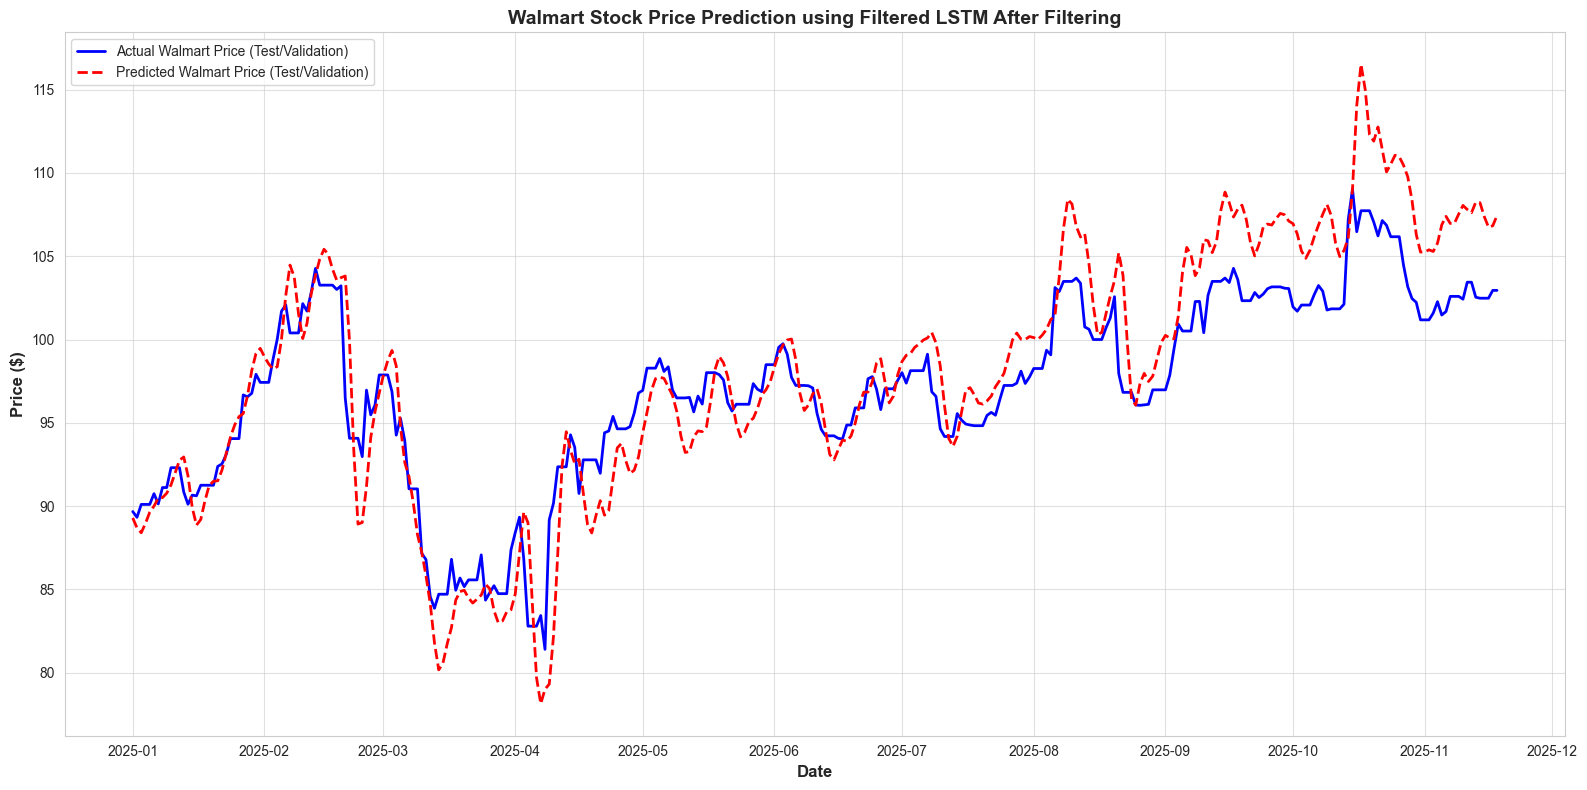


✅ VISUALIZATION COMPLETE!


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime
import warnings

warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

print("="*80)
print("📊 FILTERED LSTM MODEL PREDICTIONS VISUALIZATION")
print("="*80)

# ======================================================================
# 1. LOAD MODEL, SCALERS, AND DATA
# ======================================================================
print("\n[Step 1/3] Loading filtered model, scalers, and preprocessed data...")
try:
    # Load the trained LSTM model (filtered version)
    best_model = tf.keras.models.load_model('best_lstm_model_filtered.keras')
    print("   ✓ Filtered LSTM model loaded successfully")
    
    # Load scalers (filtered version)
    with open('scaler_X_filtered.pkl', 'rb') as f: 
        scaler_X = pickle.load(f)
    with open('scaler_y_filtered.pkl', 'rb') as f: 
        scaler_y = pickle.load(f)
    print("   ✓ Scalers loaded successfully")
    
    # Load preprocessed data (filtered version)
    data = np.load('lstm_preprocessed_data_filtered.npz', allow_pickle=True)
    X_seq = data['X_seq']
    y_seq = data['y_seq']
    sequence_dates = pd.to_datetime(data['sequence_dates_values'])
    train_mask = data['train_mask']
    test_mask = data['test_mask']
    filtered_columns = data['filtered_columns'] # Also load filtered columns for context
    print("   ✓ Preprocessed data loaded successfully")
    
except FileNotFoundError as e:
    print(f"   ✗ Error: Required file not found - {e}")
    print("   Please ensure you have run the filtered LSTM training script first to generate these files.")
    exit()
except Exception as e:
    print(f"   ✗ Unexpected error loading files: {e}")
    exit()

# Split data for the test/validation set
X_test = X_seq[test_mask]
y_test = y_seq[test_mask]
test_dates_plot = sequence_dates[test_mask]

print(f"\n   📊 Data Statistics for Test/Validation Set (Filtered):")
print(f"      Test samples:    {len(X_test):,}")
print(f"      Sequence shape:  {X_test.shape}")
print(f"      Features per step: {X_test.shape[2]} (Features: {list(filtered_columns)})")
print(f"      Time steps:      {X_test.shape[1]}")

# ======================================================================
# 2. GENERATE PREDICTIONS AND INVERSE TRANSFORM
# ======================================================================
print("\n[Step 2/3] Generating predictions and inverse transforming data...")

# Make predictions on the test set
y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)

# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("   ✓ Predictions generated and inverse transformed.")
# ...existing code...
# Inverse transform predictions and actual values to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

print("   ✓ Predictions generated and inverse transformed.")

# ======================================================================
# ACCURACY STATISTICS
# ======================================================================
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test_actual, y_pred)

# Calculate MAPE (Mean Absolute Percentage Error)
# Avoid division by zero for MAPE if actual values can be zero
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual[y_test_actual != 0])) * 100 if np.any(y_test_actual != 0) else 0

# Calculate R-squared
r2 = r2_score(y_test_actual, y_pred)

# Calculate Directional Accuracy
# Compare the sign of actual price changes with predicted price changes
actual_direction = np.sign(np.diff(y_test_actual.flatten()))
pred_direction = np.sign(np.diff(y_pred.flatten()))
direction_accuracy = np.mean(actual_direction == pred_direction) * 100

# Create a DataFrame for accuracy statistics
filtered_accuracy_metrics = pd.DataFrame({
    'Metric': [
        'Root Mean Squared Error (RMSE)',
        'Mean Absolute Error (MAE)',
        'Mean Absolute Percentage Error (MAPE)',
        'R-squared (R²)',
        'Directional Accuracy'
    ],
    'Value': [
        f"${rmse:.2f}",
        f"${mae:.2f}",
        f"{mape:.2f}%",
        f"{r2:.4f}",
        f"{direction_accuracy:.2f}%"
    ]
})

print("\n📊 Model Accuracy Statistics (Filtered Model):")
display(filtered_accuracy_metrics) # Display the DataFrame

# ======================================================================
# 3. PLOT ACTUAL VS. PREDICTED DATA
# ======================================================================
print("\n[Step 3/3] Creating and saving visualization...")

plt.figure(figsize=(16, 8))
plt.plot(test_dates_plot, y_test_actual, label='Actual Walmart Price (Test/Validation)', color='blue', linewidth=2)
plt.plot(test_dates_plot, y_pred, label='Predicted Walmart Price (Test/Validation)', color='red', linestyle='--', linewidth=2)
plt.title('Walmart Stock Price Prediction using Filtered LSTM After Filtering', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Price ($)', fontsize=12, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.6)
plt.tight_layout()

# Save the plot as a PNG file
output_filename = 'filtered_lstm_validation_actual_vs_predicted.png'
plt.savefig(output_filename, dpi=150, bbox_inches='tight')
print(f"   ✓ Plot saved as '{output_filename}'")
plt.show()
plt.close()

print("\n" + "="*80)
print("✅ VISUALIZATION COMPLETE!")
print("="*80)

## <span style = 'color:red'> VI. Comparing the model with filtered variables

In [ ]:
# ======================================================================
# COMBINE AND COMPARE ACCURACY STATISTICS
# ======================================================================
print("\n[Step 4/4] Combining and comparing model accuracy statistics...")

# Make copies to avoid modifying original DataFrames
original_metrics_df = accuracy_metrics.copy()
filtered_metrics_df = filtered_accuracy_metrics.copy()

# Rename 'Value' column for clarity before merging
original_metrics_df = original_metrics_df.rename(columns={'Value': 'Original_Model'})
filtered_metrics_df = filtered_metrics_df.rename(columns={'Value': 'Filtered_Model'})

# Merge the two DataFrames on the 'Metric' column
combined_metrics = pd.merge(original_metrics_df, filtered_metrics_df, on='Metric', how='inner')

# Define a helper function to convert string values to numeric
def convert_to_numeric(value_str):
    if isinstance(value_str, (int, float)):
        return float(value_str)
    
    value_str = str(value_str).strip()
    if value_str.startswith('$'):
        return float(value_str.replace('$', ''))
    elif value_str.endswith('%'):
        return float(value_str.replace('%', ''))
    else:
        return float(value_str)

# Convert 'Original_Model' and 'Filtered_Model' to numeric for calculation
combined_metrics['Original_Numeric'] = combined_metrics['Original_Model'].apply(convert_to_numeric)
combined_metrics['Filtered_Numeric'] = combined_metrics['Filtered_Model'].apply(convert_to_numeric)

# Calculate the difference (Filtered Model - Original Model)
combined_metrics['Difference'] = combined_metrics['Filtered_Numeric'] - combined_metrics['Original_Numeric']

# Format the 'Difference' column based on the metric type
def format_difference(row):
    metric = row['Metric']
    diff = row['Difference']
    if 'RMSE' in metric or 'MAE' in metric:
        return f"${diff:+.2f}"
    elif 'MAPE' in metric or 'Directional Accuracy' in metric:
        return f"{diff:+.2f}%"
    elif 'R-squared' in metric:
        return f"{diff:+.4f}"
    return f"{diff:+.2f}" # Default formatting

combined_metrics['Difference'] = combined_metrics.apply(format_difference, axis=1)

# Select and reorder columns for final display
final_comparison_df = combined_metrics[['Metric', 'Original_Model', 'Filtered_Model', 'Difference']]

print("\n📊 Combined Model Accuracy Statistics (Original vs. Filtered):")
display(final_comparison_df)

print("\n   ✓ Combined statistics generated and displayed.")

# ======================================================================
# 3. PLOT ACTUAL VS. PREDICTED DATA
# ...existing code...
final_comparison_df.to_csv('comparison.csv')


[Step 4/4] Combining and comparing model accuracy statistics...

📊 Combined Model Accuracy Statistics (Original vs. Filtered):


,Metric,Original_Model,Filtered_Model,Difference
0,Root Mean Squared Error (RMSE),$7.02,$3.03,$-3.99
1,Mean Absolute Error (MAE),$6.17,$2.38,$-3.79
2,Mean Absolute Percentage Error (MAPE),6.25%,2.46%,-3.79%
3,R-squared (R²),-0.5943,0.7035,+1.2978
4,Directional Accuracy,32.40%,39.56%,+7.16%



   ✓ Combined statistics generated and displayed.


In [ ]:
# import numpy as np
# import tensorflow as tf
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pickle
# from sklearn.metrics import (mean_squared_error, mean_absolute_error, r2_score, 
#                              mean_absolute_percentage_error, median_absolute_error)
# import warnings

# warnings.filterwarnings('ignore')
# sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 11, 'figure.max_open_warning': 0})

# print("="*80)
# print("🔍 FILTERED LSTM MODEL - DETAILED EVALUATION")
# print("="*80)

# # ======================================================================
# # 1. LOAD MODEL, SCALERS, AND DATA
# # ======================================================================
# print("\n[Step 1/5] Loading filtered model and data...")
# try:
#     # Load the filtered model
#     best_model = tf.keras.models.load_model('best_lstm_model_filtered.keras')
#     print("   ✓ Filtered LSTM model loaded successfully")
    
#     # Load scalers
#     with open('scaler_X_filtered.pkl', 'rb') as f:
#         scaler_X = pickle.load(f)
#     with open('scaler_y_filtered.pkl', 'rb') as f:
#         scaler_y = pickle.load(f)
#     print("   ✓ Scalers loaded successfully")
    
#     # Load preprocessed data
#     data = np.load('lstm_preprocessed_data_filtered.npz', allow_pickle=True)
#     X_seq = data['X_seq']
#     y_seq = data['y_seq']
#     sequence_dates = pd.to_datetime(data['sequence_dates_values'])
#     train_mask = data['train_mask']
#     test_mask = data['test_mask']
#     filtered_columns = data['filtered_columns']
#     print("   ✓ Preprocessed data loaded successfully")
    
#     # 🔑 FIX: Print actual shapes to verify
#     print(f"\n   ✓ Loaded Data Shapes:")
#     print(f"      X_seq shape: {X_seq.shape}")
#     print(f"      Model input shape: {best_model.input_shape}")
#     print(f"      Filtered columns: {list(filtered_columns)}")
    
# except FileNotFoundError as e:
#     print(f"   ✗ Error: {e}")
#     print("   Please ensure you have trained the filtered model first.")
#     exit()
# except Exception as e:
#     print(f"   ✗ Unexpected error: {e}")
#     exit()

# # Split data using the loaded masks
# X_train = X_seq[train_mask]
# y_train = y_seq[train_mask]
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]

# print(f"\n   📊 Data Summary:")
# print(f"      Training samples:   {len(X_train):,}")
# print(f"      Test samples:       {len(X_test):,}")
# print(f"      Total samples:      {len(X_seq):,}")
# print(f"      Sequence shape:     {X_seq.shape}")
# print(f"      Features used:      {list(filtered_columns)}")
# print(f"      Number of features: {X_seq.shape[2]}")
# print(f"      Time steps:         {X_seq.shape[1]}")

# # 🔑 FIX: Verify the data shapes match model expectations
# expected_features = best_model.input_shape[2]
# expected_timesteps = best_model.input_shape[1]

# if X_train.shape[2] != expected_features or X_train.shape[1] != expected_timesteps:
#     print(f"\n   ⚠️  SHAPE MISMATCH DETECTED!")
#     print(f"      Expected: ({expected_timesteps}, {expected_features})")
#     print(f"      Got: ({X_train.shape[1]}, {X_train.shape[2]})")
#     print(f"      This mismatch will cause errors during prediction.")
#     print(f"      Attempting to recover by using only the relevant features...")
    
#     if X_train.shape[2] > expected_features:
#         print(f"      Selecting first {expected_features} features from {X_train.shape[2]}...")
#         X_train = X_train[:, :, :expected_features]
#         X_test = X_test[:, :, :expected_features]
#         print(f"      ✓ Shape adjusted to: {X_train.shape}")
#     else:
#         print(f"      ✗ Cannot recover: model expects more features than available")
#         exit()

# # ======================================================================
# # 2. MAKE PREDICTIONS ON TRAIN AND TEST SETS
# # ======================================================================
# print("\n[Step 2/5] Making predictions...")

# try:
#     # Training set predictions
#     y_train_pred_scaled = best_model.predict(X_train, verbose=0, batch_size=64)
#     y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
#     y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))
    
#     # Test set predictions
#     y_test_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)
#     y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)
#     y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    
#     print("   ✓ Predictions completed for both train and test sets")
    
# except Exception as e:
#     print(f"   ✗ Error during prediction: {e}")
#     exit()

# # ======================================================================
# # 3. COMPREHENSIVE EVALUATION METRICS
# # ======================================================================
# print("\n[Step 3/5] Computing comprehensive metrics...")

# # Training metrics
# train_rmse = np.sqrt(mean_squared_error(y_train_actual, y_train_pred))
# train_mae = mean_absolute_error(y_train_actual, y_train_pred)
# train_mape = mean_absolute_percentage_error(y_train_actual, y_train_pred) * 100
# train_median_ae = median_absolute_error(y_train_actual, y_train_pred)
# train_r2 = r2_score(y_train_actual, y_train_pred)

# # Test metrics
# test_rmse = np.sqrt(mean_squared_error(y_test_actual, y_test_pred))
# test_mae = mean_absolute_error(y_test_actual, y_test_pred)
# test_mape = mean_absolute_percentage_error(y_test_actual, y_test_pred) * 100
# test_median_ae = median_absolute_error(y_test_actual, y_test_pred)
# test_r2 = r2_score(y_test_actual, y_test_pred)

# # Direction accuracy
# train_actual_direction = np.sign(np.diff(y_train_actual.flatten()))
# train_pred_direction = np.sign(np.diff(y_train_pred.flatten()))
# train_direction_acc = np.mean(train_actual_direction == train_pred_direction) * 100

# test_actual_direction = np.sign(np.diff(y_test_actual.flatten()))
# test_pred_direction = np.sign(np.diff(y_test_pred.flatten()))
# test_direction_acc = np.mean(test_actual_direction == test_pred_direction) * 100

# # Additional statistics
# train_errors = np.abs(y_train_actual - y_train_pred).flatten()
# test_errors = np.abs(y_test_actual - y_test_pred).flatten()

# print(f"   ✓ Metrics computed successfully")

# # ======================================================================
# # 4. DISPLAY DETAILED RESULTS
# # ======================================================================
# print("\n" + "="*80)
# print("📊 DETAILED MODEL EVALUATION RESULTS")
# print("="*80)

# print("\n🎯 TRAINING SET METRICS:")
# print(f"   ├─ RMSE:                 ${train_rmse:>10.2f}")
# print(f"   ├─ MAE:                  ${train_mae:>10.2f}")
# print(f"   ├─ Median AE:            ${train_median_ae:>10.2f}")
# print(f"   ├─ MAPE:                 {train_mape:>10.2f}%")
# print(f"   ├─ R² Score:             {train_r2:>10.4f}")
# print(f"   ├─ Direction Accuracy:   {train_direction_acc:>10.2f}%")
# print(f"   ├─ Min Error:            ${train_errors.min():>10.2f}")
# print(f"   ├─ Max Error:            ${train_errors.max():>10.2f}")
# print(f"   └─ Std Dev (Errors):     ${train_errors.std():>10.2f}")

# print("\n🎯 TEST SET METRICS:")
# print(f"   ├─ RMSE:                 ${test_rmse:>10.2f}")
# print(f"   ├─ MAE:                  ${test_mae:>10.2f}")
# print(f"   ├─ Median AE:            ${test_median_ae:>10.2f}")
# print(f"   ├─ MAPE:                 {test_mape:>10.2f}%")
# print(f"   ├─ R² Score:             {test_r2:>10.4f}")
# print(f"   ├─ Direction Accuracy:   {test_direction_acc:>10.2f}%")
# print(f"   ├─ Min Error:            ${test_errors.min():>10.2f}")
# print(f"   ├─ Max Error:            ${test_errors.max():>10.2f}")
# print(f"   └─ Std Dev (Errors):     ${test_errors.std():>10.2f}")

# print("\n📈 MODEL GENERALIZATION:")
# overfit_rmse = ((test_rmse - train_rmse) / train_rmse * 100)
# overfit_r2 = train_r2 - test_r2
# print(f"   ├─ RMSE Difference:      {overfit_rmse:>10.2f}%")
# print(f"   ├─ R² Difference:        {overfit_r2:>10.4f}")
# if overfit_rmse > 20:
#     print(f"   └─ Status:               ⚠️  MODEL MAY BE OVERFITTING")
# elif overfit_rmse < -20:
#     print(f"   └─ Status:               ⚠️  MODEL MAY BE UNDERFITTING")
# else:
#     print(f"   └─ Status:               ✓ GOOD GENERALIZATION")

# # ======================================================================
# # 5. VISUALIZATION DASHBOARD
# # ======================================================================
# print("\n[Step 4/5] Creating detailed visualization dashboard...")

# fig = plt.figure(figsize=(24, 18))
# gs = fig.add_gridspec(4, 3, hspace=0.35, wspace=0.3)

# # 5.1 Train vs Test Error Metrics Comparison
# ax1 = fig.add_subplot(gs[0, 0])
# metrics = ['RMSE', 'MAE', 'Median AE', 'MAPE']
# train_vals = [train_rmse, train_mae, train_median_ae, train_mape]
# test_vals = [test_rmse, test_mae, test_median_ae, test_mape]

# x = np.arange(len(metrics))
# width = 0.35

# bars1 = ax1.bar(x - width/2, train_vals, width, label='Train', color='skyblue', alpha=0.8, edgecolor='black')
# bars2 = ax1.bar(x + width/2, test_vals, width, label='Test', color='coral', alpha=0.8, edgecolor='black')

# ax1.set_ylabel('Error Value ($)', fontweight='bold', fontsize=11)
# ax1.set_title('📊 Error Metrics Comparison', fontweight='bold', fontsize=12)
# ax1.set_xticks(x)
# ax1.set_xticklabels(metrics, fontsize=9)
# ax1.legend(fontsize=10)
# ax1.grid(axis='y', alpha=0.3)

# for bars in [bars1, bars2]:
#     for bar in bars:
#         height = bar.get_height()
#         ax1.text(bar.get_x() + bar.get_width()/2., height,
#                 f'{height:.1f}', ha='center', va='bottom', fontsize=8)

# # 5.2 R² Score Comparison
# ax2 = fig.add_subplot(gs[0, 1])
# r2_scores = [train_r2, test_r2]
# r2_labels = ['Train', 'Test']
# colors = ['#2ecc71' if score > 0.5 else '#e74c3c' for score in r2_scores]

# bars = ax2.bar(r2_labels, r2_scores, color=colors, alpha=0.8, edgecolor='black', width=0.6)
# ax2.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='0.5 Threshold')
# ax2.set_ylabel('R² Score', fontweight='bold', fontsize=11)
# ax2.set_title('📈 R² Score Comparison', fontweight='bold', fontsize=12)
# ax2.set_ylim([0, 1])
# ax2.legend(fontsize=10)
# ax2.grid(axis='y', alpha=0.3)

# for i, (bar, score) in enumerate(zip(bars, r2_scores)):
#     ax2.text(bar.get_x() + bar.get_width()/2., score + 0.02,
#             f'{score:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# # 5.3 Direction Accuracy
# ax3 = fig.add_subplot(gs[0, 2])
# dir_acc = [train_direction_acc, test_direction_acc]
# dir_labels = ['Train', 'Test']

# bars = ax3.bar(dir_labels, dir_acc, color=['#3498db', '#e67e22'], alpha=0.8, edgecolor='black', width=0.6)
# ax3.axhline(y=50, color='red', linestyle='--', linewidth=2, label='Random Guess (50%)')
# ax3.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=11)
# ax3.set_title('🎯 Direction Accuracy', fontweight='bold', fontsize=12)
# ax3.set_ylim([0, 100])
# ax3.legend(fontsize=10)
# ax3.grid(axis='y', alpha=0.3)

# for bar, acc in zip(bars, dir_acc):
#     ax3.text(bar.get_x() + bar.get_width()/2., acc + 2,
#             f'{acc:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# # 5.4 Training Set: Actual vs Predicted
# ax4 = fig.add_subplot(gs[1, 0])
# train_dates = sequence_dates[train_mask]
# ax4.plot(train_dates, y_train_actual, 'o-', label='Actual', linewidth=2, 
#          markersize=3, color='blue', alpha=0.7)
# ax4.plot(train_dates, y_train_pred, 's--', label='Predicted', linewidth=2,
#          markersize=3, color='red', alpha=0.7)
# ax4.fill_between(train_dates, y_train_actual.flatten(), y_train_pred.flatten(),
#                  alpha=0.2, color='gray')
# ax4.set_xlabel('Date', fontweight='bold', fontsize=10)
# ax4.set_ylabel('Price ($)', fontweight='bold', fontsize=10)
# ax4.set_title('📊 Training Set: Actual vs Predicted', fontweight='bold', fontsize=12)
# ax4.legend(fontsize=10)
# ax4.grid(alpha=0.3)
# ax4.tick_params(axis='x', rotation=45)

# # 5.5 Test Set: Actual vs Predicted
# ax5 = fig.add_subplot(gs[1, 1])
# test_dates = sequence_dates[test_mask]
# ax5.plot(test_dates, y_test_actual, 'o-', label='Actual', linewidth=2,
#          markersize=4, color='blue', alpha=0.7)
# ax5.plot(test_dates, y_test_pred, 's--', label='Predicted', linewidth=2,
#          markersize=4, color='red', alpha=0.7)
# ax5.fill_between(test_dates, y_test_actual.flatten(), y_test_pred.flatten(),
#                  alpha=0.2, color='gray')
# ax5.set_xlabel('Date', fontweight='bold', fontsize=10)
# ax5.set_ylabel('Price ($)', fontweight='bold', fontsize=10)
# ax5.set_title('📊 Test Set: Actual vs Predicted', fontweight='bold', fontsize=12)
# ax5.legend(fontsize=10)
# ax5.grid(alpha=0.3)
# ax5.tick_params(axis='x', rotation=45)

# # 5.6 Prediction Error Distribution
# ax6 = fig.add_subplot(gs[1, 2])
# ax6.hist(train_errors, bins=30, alpha=0.6, label='Train', color='skyblue', edgecolor='black')
# ax6.hist(test_errors, bins=30, alpha=0.6, label='Test', color='coral', edgecolor='black')
# ax6.axvline(train_errors.mean(), color='blue', linestyle='--', linewidth=2, 
#            label=f'Train Mean: ${train_errors.mean():.2f}')
# ax6.axvline(test_errors.mean(), color='red', linestyle='--', linewidth=2,
#            label=f'Test Mean: ${test_errors.mean():.2f}')
# ax6.set_xlabel('Absolute Error ($)', fontweight='bold', fontsize=10)
# ax6.set_ylabel('Frequency', fontweight='bold', fontsize=10)
# ax6.set_title('📊 Error Distribution', fontweight='bold', fontsize=12)
# ax6.legend(fontsize=9)
# ax6.grid(axis='y', alpha=0.3)

# # 5.7 Residual Plot
# ax7 = fig.add_subplot(gs[2, 0])
# residuals = y_test_actual.flatten() - y_test_pred.flatten()
# ax7.scatter(y_test_pred, residuals, alpha=0.6, s=50, color='purple', edgecolors='black', linewidth=0.5)
# ax7.axhline(y=0, color='red', linestyle='--', linewidth=2)
# ax7.set_xlabel('Predicted Price ($)', fontweight='bold', fontsize=10)
# ax7.set_ylabel('Residuals ($)', fontweight='bold', fontsize=10)
# ax7.set_title('📉 Residual Plot (Test Set)', fontweight='bold', fontsize=12)
# ax7.grid(alpha=0.3)

# residual_mean = residuals.mean()
# residual_std = residuals.std()
# ax7.text(0.05, 0.95, f'Mean: ${residual_mean:.2f}\nStd: ${residual_std:.2f}',
#         transform=ax7.transAxes, fontsize=9, verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# # 5.8 Scatter: Actual vs Predicted
# ax8 = fig.add_subplot(gs[2, 1])
# ax8.scatter(y_test_actual, y_test_pred, alpha=0.6, s=50, color='green', edgecolors='black', linewidth=0.5)

# min_price = min(y_test_actual.min(), y_test_pred.min())
# max_price = max(y_test_actual.max(), y_test_pred.max())
# ax8.plot([min_price, max_price], [min_price, max_price], 'r--', linewidth=2, label='Perfect Prediction')

# ax8.set_xlabel('Actual Price ($)', fontweight='bold', fontsize=10)
# ax8.set_ylabel('Predicted Price ($)', fontweight='bold', fontsize=10)
# ax8.set_title('🎯 Actual vs Predicted (Test Set)', fontweight='bold', fontsize=12)
# ax8.legend(fontsize=10)
# ax8.grid(alpha=0.3)

# # 5.9 Error Over Time
# ax9 = fig.add_subplot(gs[2, 2])
# ax9.plot(range(len(test_errors)), test_errors, 'o-', linewidth=2, markersize=4, color='orange', alpha=0.7)
# ax9.axhline(y=test_errors.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${test_errors.mean():.2f}')
# ax9.fill_between(range(len(test_errors)), 0, test_errors, alpha=0.2, color='orange')
# ax9.set_xlabel('Sample Index', fontweight='bold', fontsize=10)
# ax9.set_ylabel('Absolute Error ($)', fontweight='bold', fontsize=10)
# ax9.set_title('📈 Prediction Error Over Time', fontweight='bold', fontsize=12)
# ax9.legend(fontsize=10)
# ax9.grid(alpha=0.3)

# # 5.10 Summary Table
# ax10 = fig.add_subplot(gs[3, :])
# ax10.axis('off')

# summary_data = [
#     ['Metric', 'Training', 'Test', 'Difference'],
#     ['RMSE ($)', f'{train_rmse:.2f}', f'{test_rmse:.2f}', f'{overfit_rmse:+.2f}%'],
#     ['MAE ($)', f'{train_mae:.2f}', f'{test_mae:.2f}', f'{((test_mae - train_mae) / train_mae * 100):+.2f}%'],
#     ['MAPE (%)', f'{train_mape:.2f}', f'{test_mape:.2f}', f'{((test_mape - train_mape) / train_mape * 100):+.2f}%'],
#     ['R² Score', f'{train_r2:.4f}', f'{test_r2:.4f}', f'{overfit_r2:+.4f}'],
#     ['Direction Acc. (%)', f'{train_direction_acc:.2f}', f'{test_direction_acc:.2f}', 
#      f'{(test_direction_acc - train_direction_acc):+.2f}%'],
#     ['Median AE ($)', f'{train_median_ae:.2f}', f'{test_median_ae:.2f}', 
#      f'{((test_median_ae - train_median_ae) / train_median_ae * 100):+.2f}%'],
# ]

# table = ax10.table(cellText=summary_data, cellLoc='center', loc='center',
#                    colWidths=[0.25, 0.25, 0.25, 0.25])
# table.auto_set_font_size(False)
# table.set_fontsize(11)
# table.scale(1, 2.5)

# for i in range(4):
#     table[(0, i)].set_facecolor('#34495e')
#     table[(0, i)].set_text_props(weight='bold', color='white')

# for i in range(1, len(summary_data)):
#     for j in range(4):
#         if i % 2 == 0:
#             table[(i, j)].set_facecolor('#ecf0f1')
#         else:
#             table[(i, j)].set_facecolor('#ffffff')

# ax10.set_title('📋 Performance Metrics Summary', fontweight='bold', fontsize=13, pad=20)

# plt.suptitle('Filtered LSTM Model - Comprehensive Evaluation Dashboard', 
#              fontsize=18, fontweight='bold', y=0.995)

# output_file = 'lstm_filtered_evaluation_dashboard.png'
# plt.savefig(output_file, dpi=150, bbox_inches='tight')
# print(f"   ✓ Dashboard saved as '{output_file}'")
# plt.show()

# print("\n[Step 5/5] Evaluation complete!")
# print("="*80)
# print("✅ DETAILED EVALUATION FINISHED")
# print("="*80)

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# import pickle
# import warnings
# from datetime import datetime, timedelta
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# warnings.filterwarnings('ignore')
# sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 10, 'figure.max_open_warning': 0})

# print("="*80)
# print("🎯 LSTM-BASED PORTFOLIO BACKTESTING STRATEGY FOR WALMART STOCK")
# print("   (TAKE PROFIT / STOP LOSS STRATEGY)")
# print("="*80)

# # ======================================================================
# # 🔑 USER-CONFIGURABLE STRATEGY PARAMETERS
# # ======================================================================
# print("\n" + "="*80)
# print("⚙️  STRATEGY PARAMETERS (CUSTOMIZABLE)")
# print("="*80)

# # Parameter 1: Initial Capital Amount
# while True:
#     try:
#         initial_capital_input = input("Enter initial capital amount (e.g., 100000): ")
#         INITIAL_CAPITAL = float(initial_capital_input)
#         if INITIAL_CAPITAL <= 0:
#             print("Capital must be a positive number. Please try again.")
#             continue
#         break
#     except ValueError:
#         print("Invalid input. Please enter a numeric value for capital.")

# # Parameter 2: Allow short-selling? (True or False)
# while True:
#     allow_short_selling_input = input("Allow short-selling? (True/False): ").strip().lower()
#     if allow_short_selling_input in ['true', 'false']:
#         ALLOW_SELLS = (allow_short_selling_input == 'true')
#         break
#     else:
#         print("Invalid input. Please enter 'True' or 'False'.")

# # Parameter 3: Return threshold to initiate an order (%)
# while True:
#     try:
#         buy_threshold_input = input("Enter return threshold to initiate an order (e.g., 0.02 for 2%): ")
#         BUY_THRESHOLD_PCT = float(buy_threshold_input)
#         if BUY_THRESHOLD_PCT < 0:
#             print("Threshold cannot be negative. Please enter a non-negative numeric value.")
#             continue
#         break
#     except ValueError:
#         print("Invalid input. Please enter a numeric value for the threshold.")

# # Parameter 4: Take Profit percentage
# while True:
#     try:
#         take_profit_input = input("Enter take profit percentage (e.g., 0.05 for 5%): ")
#         TAKE_PROFIT_PCT = float(take_profit_input)
#         if TAKE_PROFIT_PCT <= 0:
#             print("Take profit must be a positive number. Please try again.")
#             continue
#         break
#     except ValueError:
#         print("Invalid input. Please enter a numeric value for take profit.")

# # Parameter 5: Stop Loss percentage
# while True:
#     try:
#         stop_loss_input = input("Enter stop loss percentage (e.g., 0.03 for 3%): ")
#         STOP_LOSS_PCT = float(stop_loss_input)
#         if STOP_LOSS_PCT <= 0:
#             print("Stop loss must be a positive number. Please try again.")
#             continue
#         break
#     except ValueError:
#         print("Invalid input. Please enter a numeric value for stop loss.")

# print(f"\n🔹 INITIAL_CAPITAL = ${INITIAL_CAPITAL:,.2f}")
# print(f"🔹 ALLOW_SELLS = {ALLOW_SELLS}")
# print(f"🔹 ENTRY_THRESHOLD = {BUY_THRESHOLD_PCT * 100:.2f}%")
# print(f"🔹 TAKE_PROFIT = {TAKE_PROFIT_PCT * 100:.2f}%")
# print(f"🔹 STOP_LOSS = {STOP_LOSS_PCT * 100:.2f}%")
# print(f"\n   → Strategy Logic:")
# print(f"      • LONG: Open when predicted_return >= {BUY_THRESHOLD_PCT * 100:.2f}%")
# print(f"              Close when profit >= {TAKE_PROFIT_PCT * 100:.2f}% OR loss >= {STOP_LOSS_PCT * 100:.2f}%")
# if ALLOW_SELLS:
#     print(f"      • SHORT: Open when predicted_return <= -{BUY_THRESHOLD_PCT * 100:.2f}%")
#     print(f"               Close when profit >= {TAKE_PROFIT_PCT * 100:.2f}% OR loss >= {STOP_LOSS_PCT * 100:.2f}%")

# print(f"\n" + "="*80 + "\n")

# # ======================================================================
# # 1. LOAD MODEL, SCALERS, AND DATA
# # ======================================================================
# print("[Step 1/8] Loading trained model and data...")
# try:
#     best_model = tf.keras.models.load_model('best_lstm_model_filtered.keras')
    
#     with open('scaler_X_filtered.pkl', 'rb') as f:
#         scaler_X = pickle.load(f)
#     with open('scaler_y_filtered.pkl', 'rb') as f:
#         scaler_y = pickle.load(f)
    
#     data = np.load('lstm_preprocessed_data_filtered.npz', allow_pickle=True)
#     X_seq = data['X_seq']
#     y_seq = data['y_seq']
#     sequence_dates = pd.to_datetime(data['sequence_dates_values'])
#     train_mask = data['train_mask']
#     test_mask = data['test_mask']
#     filtered_columns = data['filtered_columns']
    
#     print("   ✓ Model and data loaded successfully")
# except Exception as e:
#     print(f"   ✗ Error: {e}")
#     exit()

# # Split data
# X_test = X_seq[test_mask]
# y_test = y_seq[test_mask]
# test_dates = sequence_dates[test_mask]

# print(f"   • Test period: {test_dates.min().date()} to {test_dates.max().date()}")
# print(f"   • Test samples: {len(X_test):,}")

# # ======================================================================
# # 2. GENERATE PREDICTIONS AND SIGNALS
# # ======================================================================
# print("\n[Step 2/8] Generating price predictions and trading signals...")

# y_pred_scaled = best_model.predict(X_test, verbose=0, batch_size=64)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)
# y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# # Create a DataFrame with predictions
# predictions_df = pd.DataFrame({
#     'Date': test_dates,
#     'Actual_Price': y_test_actual.flatten(),
#     'Predicted_Price': y_pred.flatten(),
#     'Price_Change': np.diff(y_test_actual.flatten(), prepend=y_test_actual[0]),
#     'Pred_Change': np.diff(y_pred.flatten(), prepend=y_pred[0])
# })

# # ======================================================================
# # 3. DEFINE TRADING SIGNALS (TP/SL STRATEGY)
# # ======================================================================
# print("\n[Step 3/8] Generating trading signals with TP/SL strategy...")

# # Calculate expected returns
# predictions_df['Expected_Return_Pct'] = (
#     (predictions_df['Predicted_Price'] - predictions_df['Actual_Price']) / 
#     predictions_df['Actual_Price'] * 100
# )

# # Generate signals based on threshold
# predictions_df['Signal_Long'] = np.where(
#     predictions_df['Expected_Return_Pct'] >= BUY_THRESHOLD_PCT * 100,
#     1,  # LONG signal
#     0   # No signal
# )

# if ALLOW_SELLS:
#     predictions_df['Signal_Short'] = np.where(
#         predictions_df['Expected_Return_Pct'] <= -BUY_THRESHOLD_PCT * 100,
#         -1,  # SHORT signal
#         0   # No signal
#     )
#     predictions_df['Signal_Final'] = predictions_df['Signal_Long'] + predictions_df['Signal_Short']
# else:
#     predictions_df['Signal_Final'] = predictions_df['Signal_Long']

# print(f"   ✓ Trading signals generated (TP/SL mode)")
# print(f"   • LONG signals:  {(predictions_df['Signal_Final'] == 1).sum()}")
# if ALLOW_SELLS:
#     print(f"   • SHORT signals: {(predictions_df['Signal_Final'] == -1).sum()}")
# print(f"   • HOLD signals:  {(predictions_df['Signal_Final'] == 0).sum()}")

# # ======================================================================
# # 4. PORTFOLIO BACKTESTING ENGINE WITH TP/SL
# # ======================================================================
# print("\n[Step 4/8] Running portfolio backtest with TP/SL strategy...")

# class PortfolioBacktester:
#     def __init__(self, initial_capital, position_size=0.95, take_profit_pct=0.05, stop_loss_pct=0.03):
#         self.initial_capital = initial_capital
#         self.position_size = position_size
#         self.take_profit_pct = take_profit_pct
#         self.stop_loss_pct = stop_loss_pct
#         self.capital = initial_capital
#         self.position = 0
#         self.position_type = None  # 'LONG' or 'SHORT'
#         self.entry_date = None
#         self.entry_price = None
#         self.days_held = 0
#         self.portfolio_value = [initial_capital]
#         self.trade_log = []
        
#     def check_exit_condition(self, current_price):
#         """Check if position should be closed based on TP/SL"""
#         if self.position == 0 or self.entry_price is None:
#             return False, None
        
#         if self.position_type == 'LONG':
#             # Calculate profit/loss percentage for LONG
#             pnl_pct = (current_price - self.entry_price) / self.entry_price
            
#             if pnl_pct >= self.take_profit_pct:
#                 return True, 'Take Profit Hit'
#             elif pnl_pct <= -self.stop_loss_pct:
#                 return True, 'Stop Loss Hit'
                
#         elif self.position_type == 'SHORT':
#             # Calculate profit/loss percentage for SHORT (inverse)
#             pnl_pct = (self.entry_price - current_price) / self.entry_price
            
#             if pnl_pct >= self.take_profit_pct:
#                 return True, 'Take Profit Hit'
#             elif pnl_pct <= -self.stop_loss_pct:
#                 return True, 'Stop Loss Hit'
        
#         return False, None
    
#     def execute_trade(self, date, price, signal):
#         """Execute trade based on signal with TP/SL logic"""
        
#         # Check if we need to close existing position (TP/SL rule)
#         should_exit, reason = self.check_exit_condition(price)
#         if should_exit:
#             self.close_position(date, price, reason=reason)
        
#         # If no position, check for entry signal
#         if self.position == 0 and signal != 0:
#             if signal == 1:  # LONG entry
#                 shares_to_buy = (self.capital * self.position_size) / price
#                 cost = shares_to_buy * price
#                 self.capital -= cost
#                 self.position = shares_to_buy
#                 self.position_type = 'LONG'
#                 self.entry_date = date
#                 self.entry_price = price
#                 self.days_held = 0
                
#                 self.trade_log.append({
#                     'Date': date,
#                     'Type': 'LONG_ENTRY',
#                     'Price': price,
#                     'Shares': shares_to_buy,
#                     'Cost': cost,
#                     'Capital_Left': self.capital,
#                     'TP_Target': price * (1 + self.take_profit_pct),
#                     'SL_Target': price * (1 - self.stop_loss_pct)
#                 })
                
#             elif signal == -1:  # SHORT entry
#                 shares_to_short = (self.capital * self.position_size) / price
#                 proceeds = shares_to_short * price
#                 self.capital += proceeds
#                 self.position = -shares_to_short
#                 self.position_type = 'SHORT'
#                 self.entry_date = date
#                 self.entry_price = price
#                 self.days_held = 0
                
#                 self.trade_log.append({
#                     'Date': date,
#                     'Type': 'SHORT_ENTRY',
#                     'Price': price,
#                     'Shares': shares_to_short,
#                     'Proceeds': proceeds,
#                     'Capital_Left': self.capital,
#                     'TP_Target': price * (1 - self.take_profit_pct),
#                     'SL_Target': price * (1 + self.stop_loss_pct)
#                 })
        
#         # Increment days held counter
#         if self.position != 0:
#             self.days_held += 1
    
#     def close_position(self, date, price, reason=''):
#         """Close current position"""
#         if self.position == 0:
#             return
        
#         if self.position_type == 'LONG':
#             proceeds = self.position * price
#             self.capital += proceeds
#             pnl = (price - self.entry_price) / self.entry_price * 100
            
#             self.trade_log.append({
#                 'Date': date,
#                 'Type': 'LONG_EXIT',
#                 'Price': price,
#                 'Shares': self.position,
#                 'Proceeds': proceeds,
#                 'Capital_Left': self.capital,
#                 'Entry_Price': self.entry_price,
#                 'PnL_%': pnl,
#                 'Days_Held': self.days_held,
#                 'Reason': reason
#             })
            
#         elif self.position_type == 'SHORT':
#             cost = abs(self.position) * price
#             self.capital -= cost
#             pnl = (self.entry_price - price) / self.entry_price * 100
            
#             self.trade_log.append({
#                 'Date': date,
#                 'Type': 'SHORT_EXIT',
#                 'Price': price,
#                 'Shares': abs(self.position),
#                 'Cost': cost,
#                 'Capital_Left': self.capital,
#                 'Entry_Price': self.entry_price,
#                 'PnL_%': pnl,
#                 'Days_Held': self.days_held,
#                 'Reason': reason
#             })
        
#         # Reset position
#         self.position = 0
#         self.position_type = None
#         self.entry_date = None
#         self.entry_price = None
#         self.days_held = 0
    
#     def update_portfolio(self, price):
#         """Update portfolio value based on current price"""
#         if self.position > 0:  # LONG
#             current_value = self.capital + (self.position * price)
#         elif self.position < 0:  # SHORT
#             current_value = self.capital - (abs(self.position) * price)
#         else:  # No position
#             current_value = self.capital
        
#         self.portfolio_value.append(current_value)
#         return current_value
    
#     def get_metrics(self):
#         """Calculate backtest metrics"""
#         pv = np.array(self.portfolio_value)
#         returns = np.diff(pv) / pv[:-1]
        
#         total_return = (pv[-1] - pv[0]) / pv[0] * 100
#         annual_return = total_return / (len(pv) / 252) if len(pv) > 252 else total_return
#         sharpe_ratio = np.mean(returns) / np.std(returns) * np.sqrt(252) if np.std(returns) > 0 else 0
#         max_dd = self._calculate_max_drawdown(pv)
#         win_rate = self._calculate_win_rate()
#         avg_holding_period = self._calculate_avg_holding_period()
        
#         return {
#             'Total_Return_%': total_return,
#             'Annual_Return_%': annual_return,
#             'Sharpe_Ratio': sharpe_ratio,
#             'Max_Drawdown_%': max_dd,
#             'Win_Rate_%': win_rate,
#             'Avg_Holding_Days': avg_holding_period,
#             'Final_Capital': self.capital,
#             'Num_Long_Entries': len([t for t in self.trade_log if t['Type'] == 'LONG_ENTRY']),
#             'Num_Short_Entries': len([t for t in self.trade_log if t['Type'] == 'SHORT_ENTRY']),
#             'Num_Exits': len([t for t in self.trade_log if 'EXIT' in t['Type']]),
#             'Num_TP_Exits': len([t for t in self.trade_log if 'EXIT' in t['Type'] and 'Take Profit' in t.get('Reason', '')]),
#             'Num_SL_Exits': len([t for t in self.trade_log if 'EXIT' in t['Type'] and 'Stop Loss' in t.get('Reason', '')])
#         }
    
#     def _calculate_max_drawdown(self, values):
#         """Calculate maximum drawdown"""
#         peak = np.maximum.accumulate(values)
#         drawdown = (values - peak) / peak * 100
#         return np.min(drawdown)
    
#     def _calculate_win_rate(self):
#         """Calculate win rate from closed trades"""
#         exit_trades = [t for t in self.trade_log if 'EXIT' in t['Type']]
#         if not exit_trades:
#             return 0
        
#         winning_trades = sum(1 for t in exit_trades if t.get('PnL_%', 0) > 0)
#         return (winning_trades / len(exit_trades)) * 100
    
#     def _calculate_avg_holding_period(self):
#         """Calculate average holding period in days"""
#         exit_trades = [t for t in self.trade_log if 'EXIT' in t['Type']]
#         if not exit_trades:
#             return 0
        
#         total_days = sum(t.get('Days_Held', 0) for t in exit_trades)
#         return total_days / len(exit_trades)

# # Run backtest
# backtester = PortfolioBacktester(
#     initial_capital=INITIAL_CAPITAL, 
#     position_size=0.95,
#     take_profit_pct=TAKE_PROFIT_PCT,
#     stop_loss_pct=STOP_LOSS_PCT
# )

# for idx, row in predictions_df.iterrows():
#     signal = row['Signal_Final']
#     price = row['Actual_Price']
#     date = row['Date']
    
#     backtester.execute_trade(date, price, signal)
#     backtester.update_portfolio(price)

# # Close any remaining position at the end
# if backtester.position != 0:
#     final_price = predictions_df.iloc[-1]['Actual_Price']
#     backtester.close_position(
#         predictions_df.iloc[-1]['Date'], 
#         final_price, 
#         reason='End of backtest'
#     )
#     backtester.update_portfolio(final_price)

# metrics = backtester.get_metrics()

# print(f"   ✓ Backtest completed")
# print(f"\n   📊 Backtest Results (TP/SL Strategy):")
# print(f"      Total Return:       {metrics['Total_Return_%']:>10.2f}%")
# print(f"      Annual Return:      {metrics['Annual_Return_%']:>10.2f}%")
# print(f"      Sharpe Ratio:       {metrics['Sharpe_Ratio']:>10.2f}")
# print(f"      Max Drawdown:       {metrics['Max_Drawdown_%']:>10.2f}%")
# print(f"      Win Rate:           {metrics['Win_Rate_%']:>10.2f}%")
# print(f"      Avg Holding Days:   {metrics['Avg_Holding_Days']:>10.1f}")
# print(f"      Long Entries:       {metrics['Num_Long_Entries']:>10}")
# if ALLOW_SELLS:
#     print(f"      Short Entries:      {metrics['Num_Short_Entries']:>10}")
# print(f"      Total Exits:        {metrics['Num_Exits']:>10}")
# print(f"      TP Exits:           {metrics['Num_TP_Exits']:>10}")
# print(f"      SL Exits:           {metrics['Num_SL_Exits']:>10}")

# # ======================================================================
# # 5. BUY & HOLD BENCHMARK
# # ======================================================================
# print("\n[Step 5/8] Calculating Buy & Hold benchmark...")

# initial_price = predictions_df.iloc[0]['Actual_Price']
# final_price = predictions_df.iloc[-1]['Actual_Price']
# bh_shares = INITIAL_CAPITAL / initial_price
# bh_final_value = bh_shares * final_price
# bh_return = ((bh_final_value - INITIAL_CAPITAL) / INITIAL_CAPITAL) * 100

# print(f"   • Buy & Hold Return: {bh_return:.2f}%")
# print(f"   • Strategy Return:   {metrics['Total_Return_%']:.2f}%")
# print(f"   • Outperformance:    {metrics['Total_Return_%'] - bh_return:+.2f}%")

# # ======================================================================
# # 6. VISUALIZATION DASHBOARD
# # ======================================================================
# print("\n[Step 6/8] Creating visualization dashboard...")

# fig = plt.figure(figsize=(24, 16))
# gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# # 6.1 Price & Trading Signals with TP/SL markers
# ax1 = fig.add_subplot(gs[0, :])
# ax1.plot(predictions_df['Date'], predictions_df['Actual_Price'], 'b-', linewidth=2, label='Actual Price')

# # Mark entry signals
# long_entries = [t for t in backtester.trade_log if t['Type'] == 'LONG_ENTRY']
# if long_entries:
#     entry_dates = [t['Date'] for t in long_entries]
#     entry_prices = [t['Price'] for t in long_entries]
#     ax1.scatter(entry_dates, entry_prices, color='green', marker='^', 
#                s=200, label='LONG Entry', zorder=5, edgecolors='darkgreen', linewidth=1.5)

# if ALLOW_SELLS:
#     short_entries = [t for t in backtester.trade_log if t['Type'] == 'SHORT_ENTRY']
#     if short_entries:
#         entry_dates = [t['Date'] for t in short_entries]
#         entry_prices = [t['Price'] for t in short_entries]
#         ax1.scatter(entry_dates, entry_prices, color='red', marker='v', 
#                    s=200, label='SHORT Entry', zorder=5, edgecolors='darkred', linewidth=1.5)

# # Mark TP exits
# tp_exits = [t for t in backtester.trade_log if 'EXIT' in t['Type'] and 'Take Profit' in t.get('Reason', '')]
# if tp_exits:
#     exit_dates = [t['Date'] for t in tp_exits]
#     exit_prices = [t['Price'] for t in tp_exits]
#     ax1.scatter(exit_dates, exit_prices, color='gold', marker='*', 
#                s=300, label='TP Exit', zorder=6, edgecolors='orange', linewidth=2)

# # Mark SL exits
# sl_exits = [t for t in backtester.trade_log if 'EXIT' in t['Type'] and 'Stop Loss' in t.get('Reason', '')]
# if sl_exits:
#     exit_dates = [t['Date'] for t in sl_exits]
#     exit_prices = [t['Price'] for t in sl_exits]
#     ax1.scatter(exit_dates, exit_prices, color='purple', marker='x', 
#                s=300, label='SL Exit', zorder=6, linewidth=3)

# ax1.set_ylabel('Price ($)', fontweight='bold', fontsize=11)
# ax1.set_title(f'🎯 Walmart Stock Price & Trading Signals (TP/SL Strategy)\n(Entry Threshold={BUY_THRESHOLD_PCT*100:.1f}%, TP={TAKE_PROFIT_PCT*100:.1f}%, SL={STOP_LOSS_PCT*100:.1f}%)', 
#              fontweight='bold', fontsize=13)
# ax1.legend(loc='best', fontsize=10, ncol=2)
# ax1.grid(alpha=0.3)
# ax1.tick_params(axis='x', rotation=45)

# # Align portfolio dates with portfolio values
# portfolio_dates = predictions_df['Date'].tolist()
# portfolio_value_aligned = backtester.portfolio_value[:len(portfolio_dates)]

# # 6.2 Portfolio Value Over Time
# ax2 = fig.add_subplot(gs[1, 0])
# ax2.plot(portfolio_dates, portfolio_value_aligned, 'g-', linewidth=2.5, label='TP/SL Strategy')
# ax2.axhline(y=INITIAL_CAPITAL, color='gray', linestyle='--', linewidth=2, label='Initial Capital')
# ax2.fill_between(range(len(portfolio_dates)), INITIAL_CAPITAL, portfolio_value_aligned, alpha=0.3, color='green')
# ax2.set_ylabel('Portfolio Value ($)', fontweight='bold', fontsize=11)
# ax2.set_title('💰 Strategy Portfolio Value', fontweight='bold', fontsize=12)
# ax2.legend(fontsize=10)
# ax2.grid(alpha=0.3)
# ax2.tick_params(axis='x', rotation=45)

# # 6.3 Buy & Hold Comparison
# ax3 = fig.add_subplot(gs[1, 1])
# bh_values = [INITIAL_CAPITAL + (INITIAL_CAPITAL / initial_price) * (predictions_df.iloc[i]['Actual_Price'] - initial_price) 
#              for i in range(len(predictions_df))]

# ax3.plot(portfolio_dates, portfolio_value_aligned, 'g-', linewidth=2.5, label='TP/SL Strategy', marker='o', markersize=2)
# ax3.plot(portfolio_dates, bh_values, 'b-', linewidth=2, label='Buy & Hold', marker='s', markersize=2, alpha=0.8)
# ax3.set_ylabel('Portfolio Value ($)', fontweight='bold', fontsize=11)
# ax3.set_title('📊 Strategy vs Buy & Hold', fontweight='bold', fontsize=12)
# ax3.legend(fontsize=10)
# ax3.grid(alpha=0.3)
# ax3.tick_params(axis='x', rotation=45)

# strategy_val = portfolio_value_aligned[-1]
# bh_val = bh_values[-1]
# ax3.text(0.02, 0.98, f'Strategy: ${strategy_val:,.0f}\nB&H: ${bh_val:,.0f}\nDiff: ${strategy_val - bh_val:+,.0f}', 
#         transform=ax3.transAxes, fontsize=10, verticalalignment='top',
#         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8, pad=0.7))

# # 6.4 Trade PnL Distribution
# ax4 = fig.add_subplot(gs[1, 2])
# exit_trades = [t for t in backtester.trade_log if 'EXIT' in t['Type']]
# if exit_trades:
#     pnls = [t['PnL_%'] for t in exit_trades]
#     tp_pnls = [t['PnL_%'] for t in exit_trades if 'Take Profit' in t.get('Reason', '')]
#     sl_pnls = [t['PnL_%'] for t in exit_trades if 'Stop Loss' in t.get('Reason', '')]
    
#     ax4.hist(pnls, bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='All Trades')
#     if tp_pnls:
#         ax4.axvline(np.mean(tp_pnls), color='green', linestyle='--', linewidth=2, label=f'TP Avg: {np.mean(tp_pnls):.2f}%')
#     if sl_pnls:
#         ax4.axvline(np.mean(sl_pnls), color='red', linestyle='--', linewidth=2, label=f'SL Avg: {np.mean(sl_pnls):.2f}%')
#     ax4.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
#     ax4.set_xlabel('PnL per Trade (%)', fontweight='bold', fontsize=10)
#     ax4.set_ylabel('Frequency', fontweight='bold', fontsize=10)
#     ax4.set_title('📈 Trade PnL Distribution', fontweight='bold', fontsize=12)
#     ax4.legend(fontsize=9)
#     ax4.grid(axis='y', alpha=0.3)

# # 6.5 Cumulative Returns
# ax5 = fig.add_subplot(gs[2, 0])
# strategy_returns = (np.array(portfolio_value_aligned) - INITIAL_CAPITAL) / INITIAL_CAPITAL * 100
# bh_returns = (np.array(bh_values) - INITIAL_CAPITAL) / INITIAL_CAPITAL * 100

# ax5.plot(range(len(portfolio_dates)), strategy_returns, 'g-', linewidth=2.5, label='TP/SL Strategy', marker='o', markersize=2)
# ax5.plot(range(len(portfolio_dates)), bh_returns, 'b-', linewidth=2, label='Buy & Hold', marker='s', markersize=2, alpha=0.8)
# ax5.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
# ax5.set_ylabel('Cumulative Return (%)', fontweight='bold', fontsize=10)
# ax5.set_xlabel('Days', fontweight='bold', fontsize=10)
# ax5.set_title('📈 Cumulative Returns Comparison', fontweight='bold', fontsize=12)
# ax5.legend(fontsize=9)
# ax5.grid(alpha=0.3)

# # 6.6 Exit Reason Distribution
# ax6 = fig.add_subplot(gs[2, 1])
# exit_reasons = {}
# for t in backtester.trade_log:
#     if 'EXIT' in t['Type']:
#         reason = t.get('Reason', 'Other')
#         exit_reasons[reason] = exit_reasons.get(reason, 0) + 1

# if exit_reasons:
#     colors_map = {'Take Profit Hit': 'gold', 'Stop Loss Hit': 'red', 'End of backtest': 'gray'}
#     colors = [colors_map.get(r, 'lightblue') for r in exit_reasons.keys()]
#     bars = ax6.bar(exit_reasons.keys(), exit_reasons.values(), color=colors, alpha=0.8, edgecolor='black', width=0.6)
#     ax6.set_xlabel('Exit Reason', fontweight='bold', fontsize=10)
#     ax6.set_ylabel('Count', fontweight='bold', fontsize=10)
#     ax6.set_title('📊 Exit Reason Distribution', fontweight='bold', fontsize=12)
#     ax6.grid(axis='y', alpha=0.3)
#     ax6.tick_params(axis='x', rotation=15)
    
#     for bar in bars:
#         height = bar.get_height()
#         ax6.text(bar.get_x() + bar.get_width()/2., height,
#                 f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# # 6.7 Performance Metrics Summary
# ax7 = fig.add_subplot(gs[2, 2])
# ax7.axis('off')

# strategy_return = metrics['Total_Return_%']

# summary_text = f"""
# 🎯 BACKTEST SUMMARY
#    (TP/SL STRATEGY)

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# PARAMETERS
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# Initial Capital: ${INITIAL_CAPITAL:,.0f}
# Entry Threshold: {BUY_THRESHOLD_PCT*100:>6.2f}%
# Take Profit:     {TAKE_PROFIT_PCT*100:>6.2f}%
# Stop Loss:       {STOP_LOSS_PCT*100:>6.2f}%
# Allow Shorts:    {str(ALLOW_SELLS):>6}

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# RETURNS
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# Strategy:      {strategy_return:>8.2f}%
# Buy & Hold:    {bh_return:>8.2f}%
# Outperform:    {strategy_return - bh_return:>+8.2f}%

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# RISK METRICS
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# Annual Ret:    {metrics['Annual_Return_%']:>8.2f}%
# Sharpe Ratio:  {metrics['Sharpe_Ratio']:>8.2f}
# Max Drawdown:  {metrics['Max_Drawdown_%']:>8.2f}%
# Win Rate:      {metrics['Win_Rate_%']:>8.2f}%
# Avg Hold Days: {metrics['Avg_Holding_Days']:>8.1f}

# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# EXECUTION
# ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
# Long Entries:  {metrics['Num_Long_Entries']:>8}
# Short Entries: {metrics['Num_Short_Entries']:>8}
# Total Exits:   {metrics['Num_Exits']:>8}
# TP Exits:      {metrics['Num_TP_Exits']:>8}
# SL Exits:      {metrics['Num_SL_Exits']:>8}
# Final Port:    ${portfolio_value_aligned[-1]:>10,.0f}
# """

# ax7.text(0.05, 0.95, summary_text, transform=ax7.transAxes, fontsize=9.5,
#          verticalalignment='top', fontfamily='monospace', fontweight='bold',
#          bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9, pad=1))

# plt.suptitle(f'LSTM Portfolio Backtesting Dashboard - Take Profit / Stop Loss Strategy', 
#              fontsize=16, fontweight='bold', y=0.995)

# output_file = 'lstm_portfolio_backtest_tpsl.png'
# plt.savefig(output_file, dpi=150, bbox_inches='tight')
# print(f"   ✓ Dashboard saved as '{output_file}'")
# plt.show()
# plt.close()

# # ======================================================================
# # 7. DETAILED TRADE LOG
# # ======================================================================
# print("\n[Step 7/8] Trade log summary...")

# trade_df = pd.DataFrame(backtester.trade_log)
# if not trade_df.empty:
#     print(f"\n   📋 Trade Statistics:")
#     print(f"      Total Trades:        {len(trade_df)}")
#     print(f"      Entry Orders:        {len(trade_df[trade_df['Type'].str.contains('ENTRY')])}")
#     print(f"      Exit Orders:         {len(trade_df[trade_df['Type'].str.contains('EXIT')])}")
    
#     exit_trades = trade_df[trade_df['Type'].str.contains('EXIT')]
#     if len(exit_trades) > 0:
#         avg_pnl = exit_trades['PnL_%'].mean()
#         winning_trades = (exit_trades['PnL_%'] > 0).sum()
#         tp_exits = len([t for t in exit_trades.iterrows() if 'Take Profit' in str(t[1].get('Reason', ''))])
#         sl_exits = len([t for t in exit_trades.iterrows() if 'Stop Loss' in str(t[1].get('Reason', ''))])
        
#         print(f"      Avg PnL per Trade:   {avg_pnl:>10.2f}%")
#         print(f"      Winning Trades:      {winning_trades} / {len(exit_trades)}")
#         print(f"      TP Exits:            {tp_exits}")
#         print(f"      SL Exits:            {sl_exits}")
#         print(f"      Avg Holding Period:  {metrics['Avg_Holding_Days']:.1f} days")
    
#     print(f"\n   📋 Recent Trades (Last 15):")
#     print(trade_df.tail(15).to_string(index=False))
# else:
#     print("   ⚠ No trades executed")

# # ======================================================================
# # 8. SAVE BACKTEST RESULTS
# # ======================================================================
# print("\n[Step 8/8] Saving backtest results...")

# backtest_results = {
#     'predictions': predictions_df,
#     'metrics': metrics,
#     'trade_log': trade_df,
#     'buy_hold_return': bh_return,
#     'strategy_return': strategy_return,
#     'backtester': backtester,
#     'portfolio_values': portfolio_value_aligned,
#     'bh_values': bh_values,
#     'parameters': {
#         'BUY_THRESHOLD_PCT': BUY_THRESHOLD_PCT,
#         'ALLOW_SELLS': ALLOW_SELLS,
#         'INITIAL_CAPITAL': INITIAL_CAPITAL,
#         'TAKE_PROFIT_PCT': TAKE_PROFIT_PCT,
#         'STOP_LOSS_PCT': STOP_LOSS_PCT,
#         'POSITION_SIZE': 0.95
#     }
# }

# import joblib
# joblib.dump(backtest_results, 'lstm_portfolio_backtest_tpsl_results.pkl')
# predictions_df.to_csv('lstm_backtest_predictions_tpsl.csv', index=False)
# trade_df.to_csv('lstm_backtest_trades_tpsl.csv', index=False)

# print(f"   ✓ Backtest results saved to 'lstm_portfolio_backtest_tpsl_results.pkl'")
# print(f"   ✓ Predictions saved to 'lstm_backtest_predictions_tpsl.csv'")
# print(f"   ✓ Trade log saved to 'lstm_backtest_trades_tpsl.csv'")

# # ======================================================================
# # 9. FINAL SUMMARY
# # ======================================================================
# print("\n" + "="*80)
# print("📊 BACKTEST SUMMARY WITH TP/SL STRATEGY")
# print("="*80)

# print(f"\n⚙️  PARAMETERS USED:")
# print(f"   • Initial Capital:    ${INITIAL_CAPITAL:,.2f}")
# print(f"   • Entry Threshold:    {BUY_THRESHOLD_PCT * 100:.2f}%")
# print(f"   • Take Profit:        {TAKE_PROFIT_PCT * 100:.2f}%")
# print(f"   • Stop Loss:          {STOP_LOSS_PCT * 100:.2f}%")
# print(f"   • Allow Shorts:       {ALLOW_SELLS}")

# print(f"\n🎯 PERFORMANCE:")
# print(f"   Strategy Return:        {strategy_return:>10.2f}%")
# print(f"   Buy & Hold Return:      {bh_return:>10.2f}%")
# print(f"   Outperformance:         {strategy_return - bh_return:>+10.2f}%")

# print(f"\n📈 RISK METRICS:")
# print(f"   Sharpe Ratio:           {metrics['Sharpe_Ratio']:>10.2f}")
# print(f"   Max Drawdown:           {metrics['Max_Drawdown_%']:>10.2f}%")
# print(f"   Win Rate:               {metrics['Win_Rate_%']:>10.2f}%")
# print(f"   Avg Holding Period:     {metrics['Avg_Holding_Days']:>10.1f} days")

# print(f"\n💼 EXECUTION:")
# print(f"   Total Trades:           {len(trade_df):>10}")
# print(f"   Long Entries:           {metrics['Num_Long_Entries']:>10}")
# print(f"   Short Entries:          {metrics['Num_Short_Entries']:>10}")
# print(f"   Total Exits:            {metrics['Num_Exits']:>10}")
# print(f"   Take Profit Exits:      {metrics['Num_TP_Exits']:>10}")
# print(f"   Stop Loss Exits:        {metrics['Num_SL_Exits']:>10}")
# print(f"   Initial Capital:        ${INITIAL_CAPITAL:>10,.0f}")
# print(f"   Final Portfolio Value:  ${portfolio_value_aligned[-1]:>10,.0f}")
# print(f"   Capital Gain/Loss:      ${portfolio_value_aligned[-1] - INITIAL_CAPITAL:>+10,.0f}")

# if metrics['Num_Exits'] > 0:
#     tp_rate = (metrics['Num_TP_Exits'] / metrics['Num_Exits']) * 100
#     sl_rate = (metrics['Num_SL_Exits'] / metrics['Num_Exits']) * 100
#     print(f"\n📊 EXIT BREAKDOWN:")
#     print(f"   TP Exit Rate:           {tp_rate:>10.1f}%")
#     print(f"   SL Exit Rate:           {sl_rate:>10.1f}%")

# print(f"\n💡 STRATEGY INSIGHTS:")
# print(f"   • Positions close automatically when hitting TP or SL targets")
# print(f"   • No time-based exit - positions held until TP/SL is reached")
# print(f"   • Risk/Reward Ratio:    {TAKE_PROFIT_PCT / STOP_LOSS_PCT:.2f}:1")
# if metrics['Win_Rate_%'] > 0:
#     breakeven_wr = (STOP_LOSS_PCT / (TAKE_PROFIT_PCT + STOP_LOSS_PCT)) * 100
#     print(f"   • Breakeven Win Rate:   {breakeven_wr:.1f}% (Actual: {metrics['Win_Rate_%']:.1f}%)")

# print("\n" + "="*80)
# print("✅ PORTFOLIO BACKTESTING COMPLETE!")
# print("="*80)